In [1]:
# seeds for reproducibility
from numpy.random import seed
seed(1337)
from tensorflow import set_random_seed
set_random_seed(1337)

# tensorflow properties
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

# callbacks
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import EarlyStopping

# imports from other files
import Callbacks
import model_selection
import data_selection
import classes
import plotting
import util
import info_plane

## Load Data

In [2]:
set_name = "tishby"
#set_name = "mnist"
#set_name = "mnistcov"

# nrs = [3,8,1]
# samples = 1000
seed(1337)
set_random_seed(1337)
X_train, X_test, y_train, y_test = data_selection.select_data(set_name, shuffle=False,
#                                                               samples_per_class=samples,
#                                                               list_of_nrs=nrs
                                                             )

Loading tishby Data...


## Create Classes, Define model and train it

In [3]:
# object to record parameters
outputs = classes.Outputs()

nr_of_epochs = 8000
batch = 256
learning_r = 0.0004
# True if all epochs not decreasing granularity
# This should usually remain False since computational complexity will explode
record_all_flag = False
# True if test score development should be recorded
rec_test_flag = True
# if early stopping is wanted
stop_early = False


In [4]:
# model 1 = model with leading ReLU
# model 2 = model with leading TanH
# model 3 = full ReLU
# model 4 = full TanH
# ...
model, architecture = model_selection.select_model(3, nr_of_epochs, set_name,
                                                   X_train.shape, y_train)


output_recording = LambdaCallback(on_epoch_end=lambda epoch,
                                   logs: Callbacks.record_activations(outputs, model,
                                                               epoch, X_train, X_test,
                                                               y_test, batch,
                                                               record_all_flag,
                                                               rec_test_flag))
early_stopp = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

amount of classes 2
Input shape:  (3276, 12)  length:  2
Instructions for updating:
Colocations handled automatically by placer.


callback returns matrix with n arrays where n is the number of features and each array has m elements where m is the number of neurons

In [5]:
adam = optimizers.Adam(lr=learning_r)
model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["categorical_crossentropy"])

seed(1337)
set_random_seed(1337)
if stop_early == True:
    history = model.fit(X_train, y_train, epochs=nr_of_epochs, batch_size=batch,
                        validation_split=0.2, callbacks = [output_recording, early_stopp])
else:
    history = model.fit(X_train, y_train, epochs=nr_of_epochs, batch_size=batch,
                        validation_split=0.2, callbacks = [output_recording])

Train on 2620 samples, validate on 656 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/8000
2620/2620 [==============================] - 0s 145us/sample - loss: 0.6852 - categorical_crossentropy: 0.6852 - val_loss: 0.6786 - val_categorical_crossentropy: 0.6786
Epoch 2/8000
2620/2620 [==============================] - 0s 41us/sample - loss: 0.6837 - categorical_crossentropy: 0.6837 - val_loss: 0.6769 - val_categorical_crossentropy: 0.6769
Epoch 3/8000
2620/2620 [==============================] - 0s 38us/sample - loss: 0.6820 - categorical_crossentropy: 0.6820 - val_loss: 0.6750 - val_categorical_crossentropy: 0.6750
Epoch 4/8000
2620/2620 [==============================] - 0s 40us/sample - loss: 0.6802 - categorical_crossentropy: 0.6802 - val_loss: 0.6732 - val_categorical_crossentropy: 0.6732
Epoch 5/8000
2620/2620 [==============================] - 0s 38us/sample - loss: 0.6783 - categorical_crossentropy: 0.6783 - val_loss: 0.6711 - val_categorical_crossentropy: 0.6711

2620/2620 [==============================] - 0s 19us/sample - loss: 0.4115 - categorical_crossentropy: 0.4115 - val_loss: 0.4002 - val_categorical_crossentropy: 0.4002
Epoch 45/8000
2620/2620 [==============================] - 0s 56us/sample - loss: 0.4048 - categorical_crossentropy: 0.4048 - val_loss: 0.3936 - val_categorical_crossentropy: 0.3936
Epoch 46/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.3986 - categorical_crossentropy: 0.3986 - val_loss: 0.3883 - val_categorical_crossentropy: 0.3883
Epoch 47/8000
2620/2620 [==============================] - 0s 45us/sample - loss: 0.3922 - categorical_crossentropy: 0.3922 - val_loss: 0.3825 - val_categorical_crossentropy: 0.3825
Epoch 48/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.3866 - categorical_crossentropy: 0.3866 - val_loss: 0.3774 - val_categorical_crossentropy: 0.3774
Epoch 49/8000
2620/2620 [==============================] - 0s 42us/sample - loss: 0.3807 - categorical_cr

2620/2620 [==============================] - 0s 70us/sample - loss: 0.2465 - categorical_crossentropy: 0.2465 - val_loss: 0.2577 - val_categorical_crossentropy: 0.2577
Epoch 90/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.2454 - categorical_crossentropy: 0.2454 - val_loss: 0.2552 - val_categorical_crossentropy: 0.2552
Epoch 91/8000
2620/2620 [==============================] - 0s 39us/sample - loss: 0.2445 - categorical_crossentropy: 0.2445 - val_loss: 0.2587 - val_categorical_crossentropy: 0.2587
Epoch 92/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.2423 - categorical_crossentropy: 0.2423 - val_loss: 0.2527 - val_categorical_crossentropy: 0.2527
Epoch 93/8000
2620/2620 [==============================] - 0s 62us/sample - loss: 0.2427 - categorical_crossentropy: 0.2427 - val_loss: 0.2544 - val_categorical_crossentropy: 0.2544
Epoch 94/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.2415 - categorical_cro

Epoch 134/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.2168 - categorical_crossentropy: 0.2168 - val_loss: 0.2352 - val_categorical_crossentropy: 0.2352
Epoch 135/8000
2620/2620 [==============================] - 0s 41us/sample - loss: 0.2151 - categorical_crossentropy: 0.2151 - val_loss: 0.2340 - val_categorical_crossentropy: 0.2340
Epoch 136/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.2146 - categorical_crossentropy: 0.2146 - val_loss: 0.2336 - val_categorical_crossentropy: 0.2336
Epoch 137/8000
2620/2620 [==============================] - 0s 63us/sample - loss: 0.2139 - categorical_crossentropy: 0.2139 - val_loss: 0.2352 - val_categorical_crossentropy: 0.2352
Epoch 138/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.2141 - categorical_crossentropy: 0.2141 - val_loss: 0.2321 - val_categorical_crossentropy: 0.2321
Epoch 139/8000
2620/2620 [==============================] - 0s 47us/sample - loss: 0.

Epoch 179/8000
2620/2620 [==============================] - 0s 43us/sample - loss: 0.1978 - categorical_crossentropy: 0.1978 - val_loss: 0.2217 - val_categorical_crossentropy: 0.2217
Epoch 180/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.1975 - categorical_crossentropy: 0.1975 - val_loss: 0.2211 - val_categorical_crossentropy: 0.2211
Epoch 181/8000
2620/2620 [==============================] - 0s 70us/sample - loss: 0.1973 - categorical_crossentropy: 0.1973 - val_loss: 0.2200 - val_categorical_crossentropy: 0.2200
Epoch 182/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.1972 - categorical_crossentropy: 0.1972 - val_loss: 0.2210 - val_categorical_crossentropy: 0.2210
Epoch 183/8000
2620/2620 [==============================] - 0s 59us/sample - loss: 0.1969 - categorical_crossentropy: 0.1969 - val_loss: 0.2204 - val_categorical_crossentropy: 0.2204
Epoch 184/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.

2620/2620 [==============================] - 0s 50us/sample - loss: 0.1825 - categorical_crossentropy: 0.1825 - val_loss: 0.2125 - val_categorical_crossentropy: 0.2125
Epoch 224/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.1822 - categorical_crossentropy: 0.1822 - val_loss: 0.2116 - val_categorical_crossentropy: 0.2116
Epoch 225/8000
2620/2620 [==============================] - 0s 58us/sample - loss: 0.1816 - categorical_crossentropy: 0.1816 - val_loss: 0.2126 - val_categorical_crossentropy: 0.2126
Epoch 226/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.1809 - categorical_crossentropy: 0.1809 - val_loss: 0.2099 - val_categorical_crossentropy: 0.2099
Epoch 227/8000
2620/2620 [==============================] - 0s 43us/sample - loss: 0.1812 - categorical_crossentropy: 0.1812 - val_loss: 0.2110 - val_categorical_crossentropy: 0.2110
Epoch 228/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.1803 - categori

Epoch 268/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.1681 - categorical_crossentropy: 0.1681 - val_loss: 0.2024 - val_categorical_crossentropy: 0.2024
Epoch 269/8000
2620/2620 [==============================] - 0s 46us/sample - loss: 0.1688 - categorical_crossentropy: 0.1688 - val_loss: 0.1999 - val_categorical_crossentropy: 0.1999
Epoch 270/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.1677 - categorical_crossentropy: 0.1677 - val_loss: 0.2012 - val_categorical_crossentropy: 0.2012
Epoch 271/8000
2620/2620 [==============================] - 0s 55us/sample - loss: 0.1674 - categorical_crossentropy: 0.1674 - val_loss: 0.1993 - val_categorical_crossentropy: 0.1993
Epoch 272/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.1673 - categorical_crossentropy: 0.1673 - val_loss: 0.2003 - val_categorical_crossentropy: 0.2003
Epoch 273/8000
2620/2620 [==============================] - 0s 52us/sample - loss: 0.

Epoch 313/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.1591 - categorical_crossentropy: 0.1591 - val_loss: 0.1957 - val_categorical_crossentropy: 0.1957
Epoch 314/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.1584 - categorical_crossentropy: 0.1584 - val_loss: 0.1963 - val_categorical_crossentropy: 0.1963
Epoch 315/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.1585 - categorical_crossentropy: 0.1585 - val_loss: 0.1961 - val_categorical_crossentropy: 0.1961
Epoch 316/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.1582 - categorical_crossentropy: 0.1582 - val_loss: 0.1945 - val_categorical_crossentropy: 0.1945
Epoch 317/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.1589 - categorical_crossentropy: 0.1589 - val_loss: 0.1953 - val_categorical_crossentropy: 0.1953
Epoch 318/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.

Epoch 358/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.1503 - categorical_crossentropy: 0.1503 - val_loss: 0.1871 - val_categorical_crossentropy: 0.1871
Epoch 359/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.1493 - categorical_crossentropy: 0.1493 - val_loss: 0.1882 - val_categorical_crossentropy: 0.1882
Epoch 360/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.1491 - categorical_crossentropy: 0.1491 - val_loss: 0.1857 - val_categorical_crossentropy: 0.1857
Epoch 361/8000
2620/2620 [==============================] - 0s 38us/sample - loss: 0.1489 - categorical_crossentropy: 0.1489 - val_loss: 0.1864 - val_categorical_crossentropy: 0.1864
Epoch 362/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.1488 - categorical_crossentropy: 0.1488 - val_loss: 0.1844 - val_categorical_crossentropy: 0.1844
Epoch 363/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.

Epoch 403/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.1401 - categorical_crossentropy: 0.1401 - val_loss: 0.1809 - val_categorical_crossentropy: 0.1809
Epoch 404/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.1405 - categorical_crossentropy: 0.1405 - val_loss: 0.1791 - val_categorical_crossentropy: 0.1791
Epoch 405/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.1402 - categorical_crossentropy: 0.1402 - val_loss: 0.1791 - val_categorical_crossentropy: 0.1791
Epoch 406/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.1401 - categorical_crossentropy: 0.1401 - val_loss: 0.1792 - val_categorical_crossentropy: 0.1792
Epoch 407/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.1399 - categorical_crossentropy: 0.1399 - val_loss: 0.1785 - val_categorical_crossentropy: 0.1785
Epoch 408/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.

Epoch 448/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.1325 - categorical_crossentropy: 0.1325 - val_loss: 0.1732 - val_categorical_crossentropy: 0.1732
Epoch 449/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.1324 - categorical_crossentropy: 0.1324 - val_loss: 0.1758 - val_categorical_crossentropy: 0.1758
Epoch 450/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.1330 - categorical_crossentropy: 0.1330 - val_loss: 0.1726 - val_categorical_crossentropy: 0.1726
Epoch 451/8000
2620/2620 [==============================] - 0s 48us/sample - loss: 0.1330 - categorical_crossentropy: 0.1330 - val_loss: 0.1746 - val_categorical_crossentropy: 0.1746
Epoch 452/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.1335 - categorical_crossentropy: 0.1335 - val_loss: 0.1736 - val_categorical_crossentropy: 0.1736
Epoch 453/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.

Epoch 493/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.1256 - categorical_crossentropy: 0.1256 - val_loss: 0.1707 - val_categorical_crossentropy: 0.1707
Epoch 494/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.1257 - categorical_crossentropy: 0.1257 - val_loss: 0.1688 - val_categorical_crossentropy: 0.1688
Epoch 495/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1257 - categorical_crossentropy: 0.1257 - val_loss: 0.1694 - val_categorical_crossentropy: 0.1694
Epoch 496/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.1252 - categorical_crossentropy: 0.1252 - val_loss: 0.1718 - val_categorical_crossentropy: 0.1718
Epoch 497/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.1254 - categorical_crossentropy: 0.1254 - val_loss: 0.1703 - val_categorical_crossentropy: 0.1703
Epoch 498/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.1

Epoch 538/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.1184 - categorical_crossentropy: 0.1184 - val_loss: 0.1631 - val_categorical_crossentropy: 0.1631
Epoch 539/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.1191 - categorical_crossentropy: 0.1191 - val_loss: 0.1636 - val_categorical_crossentropy: 0.1636
Epoch 540/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.1173 - categorical_crossentropy: 0.1173 - val_loss: 0.1628 - val_categorical_crossentropy: 0.1628
Epoch 541/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.1180 - categorical_crossentropy: 0.1180 - val_loss: 0.1640 - val_categorical_crossentropy: 0.1640
Epoch 542/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.1174 - categorical_crossentropy: 0.1174 - val_loss: 0.1616 - val_categorical_crossentropy: 0.1616
Epoch 543/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.1

Epoch 583/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.1077 - categorical_crossentropy: 0.1077 - val_loss: 0.1506 - val_categorical_crossentropy: 0.1506
Epoch 584/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.1077 - categorical_crossentropy: 0.1077 - val_loss: 0.1500 - val_categorical_crossentropy: 0.1500
Epoch 585/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.1116 - categorical_crossentropy: 0.1116 - val_loss: 0.1497 - val_categorical_crossentropy: 0.1497
Epoch 586/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.1083 - categorical_crossentropy: 0.1083 - val_loss: 0.1506 - val_categorical_crossentropy: 0.1506
Epoch 587/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.1093 - categorical_crossentropy: 0.1093 - val_loss: 0.1470 - val_categorical_crossentropy: 0.1470
Epoch 588/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.

Epoch 628/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0970 - categorical_crossentropy: 0.0970 - val_loss: 0.1341 - val_categorical_crossentropy: 0.1341
Epoch 629/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0964 - categorical_crossentropy: 0.0964 - val_loss: 0.1352 - val_categorical_crossentropy: 0.1352
Epoch 630/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0954 - categorical_crossentropy: 0.0954 - val_loss: 0.1343 - val_categorical_crossentropy: 0.1343
Epoch 631/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0951 - categorical_crossentropy: 0.0951 - val_loss: 0.1328 - val_categorical_crossentropy: 0.1328
Epoch 632/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0951 - categorical_crossentropy: 0.0951 - val_loss: 0.1336 - val_categorical_crossentropy: 0.1336
Epoch 633/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.09

Epoch 673/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0884 - categorical_crossentropy: 0.0884 - val_loss: 0.1278 - val_categorical_crossentropy: 0.1278
Epoch 674/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0889 - categorical_crossentropy: 0.0889 - val_loss: 0.1268 - val_categorical_crossentropy: 0.1268
Epoch 675/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0883 - categorical_crossentropy: 0.0883 - val_loss: 0.1268 - val_categorical_crossentropy: 0.1268
Epoch 676/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0878 - categorical_crossentropy: 0.0878 - val_loss: 0.1272 - val_categorical_crossentropy: 0.1272
Epoch 677/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0875 - categorical_crossentropy: 0.0875 - val_loss: 0.1248 - val_categorical_crossentropy: 0.1248
Epoch 678/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.

Epoch 718/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0820 - categorical_crossentropy: 0.0820 - val_loss: 0.1184 - val_categorical_crossentropy: 0.1184
Epoch 719/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0832 - categorical_crossentropy: 0.0832 - val_loss: 0.1250 - val_categorical_crossentropy: 0.1250
Epoch 720/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0837 - categorical_crossentropy: 0.0837 - val_loss: 0.1200 - val_categorical_crossentropy: 0.1200
Epoch 721/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0837 - categorical_crossentropy: 0.0837 - val_loss: 0.1200 - val_categorical_crossentropy: 0.1200
Epoch 722/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0828 - categorical_crossentropy: 0.0828 - val_loss: 0.1215 - val_categorical_crossentropy: 0.1215
Epoch 723/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.

2620/2620 [==============================] - 0s 28us/sample - loss: 0.0774 - categorical_crossentropy: 0.0774 - val_loss: 0.1170 - val_categorical_crossentropy: 0.1170
Epoch 763/8000
2620/2620 [==============================] - 0s 21us/sample - loss: 0.0774 - categorical_crossentropy: 0.0774 - val_loss: 0.1163 - val_categorical_crossentropy: 0.1163
Epoch 764/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0786 - categorical_crossentropy: 0.0786 - val_loss: 0.1180 - val_categorical_crossentropy: 0.1180
Epoch 765/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0772 - categorical_crossentropy: 0.0772 - val_loss: 0.1159 - val_categorical_crossentropy: 0.1159
Epoch 766/8000
2620/2620 [==============================] - 0s 30us/sample - loss: 0.0773 - categorical_crossentropy: 0.0773 - val_loss: 0.1190 - val_categorical_crossentropy: 0.1190
Epoch 767/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0768 - categori

Epoch 807/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0736 - categorical_crossentropy: 0.0736 - val_loss: 0.1152 - val_categorical_crossentropy: 0.1152
Epoch 808/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0737 - categorical_crossentropy: 0.0737 - val_loss: 0.1151 - val_categorical_crossentropy: 0.1151
Epoch 809/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0735 - categorical_crossentropy: 0.0735 - val_loss: 0.1144 - val_categorical_crossentropy: 0.1144
Epoch 810/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0735 - categorical_crossentropy: 0.0735 - val_loss: 0.1154 - val_categorical_crossentropy: 0.1154
Epoch 811/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0733 - categorical_crossentropy: 0.0733 - val_loss: 0.1133 - val_categorical_crossentropy: 0.1133
Epoch 812/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.

Epoch 852/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0702 - categorical_crossentropy: 0.0702 - val_loss: 0.1131 - val_categorical_crossentropy: 0.1131
Epoch 853/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0700 - categorical_crossentropy: 0.0700 - val_loss: 0.1150 - val_categorical_crossentropy: 0.1150
Epoch 854/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0702 - categorical_crossentropy: 0.0702 - val_loss: 0.1123 - val_categorical_crossentropy: 0.1123
Epoch 855/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0697 - categorical_crossentropy: 0.0697 - val_loss: 0.1140 - val_categorical_crossentropy: 0.1140
Epoch 856/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0695 - categorical_crossentropy: 0.0695 - val_loss: 0.1146 - val_categorical_crossentropy: 0.1146
Epoch 857/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0669 - categorical_crossentropy: 0.0669 - val_loss: 0.1137 - val_categorical_crossentropy: 0.1137
Epoch 897/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0661 - categorical_crossentropy: 0.0661 - val_loss: 0.1163 - val_categorical_crossentropy: 0.1163
Epoch 898/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0666 - categorical_crossentropy: 0.0666 - val_loss: 0.1148 - val_categorical_crossentropy: 0.1148
Epoch 899/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0659 - categorical_crossentropy: 0.0659 - val_loss: 0.1121 - val_categorical_crossentropy: 0.1121
Epoch 900/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0660 - categorical_crossentropy: 0.0660 - val_loss: 0.1170 - val_categorical_crossentropy: 0.1170
Epoch 901/8000
2620/2620 [==============================] - 0s 88us/sample - loss: 0.0684 - categori

Epoch 941/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0630 - categorical_crossentropy: 0.0630 - val_loss: 0.1147 - val_categorical_crossentropy: 0.1147
Epoch 942/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0641 - categorical_crossentropy: 0.0641 - val_loss: 0.1138 - val_categorical_crossentropy: 0.1138
Epoch 943/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0664 - categorical_crossentropy: 0.0664 - val_loss: 0.1150 - val_categorical_crossentropy: 0.1150
Epoch 944/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0630 - categorical_crossentropy: 0.0630 - val_loss: 0.1147 - val_categorical_crossentropy: 0.1147
Epoch 945/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0627 - categorical_crossentropy: 0.0627 - val_loss: 0.1148 - val_categorical_crossentropy: 0.1148
Epoch 946/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.

Epoch 986/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0601 - categorical_crossentropy: 0.0601 - val_loss: 0.1152 - val_categorical_crossentropy: 0.1152
Epoch 987/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0616 - categorical_crossentropy: 0.0616 - val_loss: 0.1106 - val_categorical_crossentropy: 0.1106
Epoch 988/8000
2620/2620 [==============================] - 0s 22us/sample - loss: 0.0620 - categorical_crossentropy: 0.0620 - val_loss: 0.1132 - val_categorical_crossentropy: 0.1132
Epoch 989/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0597 - categorical_crossentropy: 0.0597 - val_loss: 0.1139 - val_categorical_crossentropy: 0.1139
Epoch 990/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0604 - categorical_crossentropy: 0.0604 - val_loss: 0.1149 - val_categorical_crossentropy: 0.1149
Epoch 991/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0578 - categorical_crossentropy: 0.0578 - val_loss: 0.1181 - val_categorical_crossentropy: 0.1181
Epoch 1031/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0566 - categorical_crossentropy: 0.0566 - val_loss: 0.1121 - val_categorical_crossentropy: 0.1121
Epoch 1032/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0561 - categorical_crossentropy: 0.0561 - val_loss: 0.1111 - val_categorical_crossentropy: 0.1111
Epoch 1033/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0572 - categorical_crossentropy: 0.0572 - val_loss: 0.1156 - val_categorical_crossentropy: 0.1156
Epoch 1034/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0561 - categorical_crossentropy: 0.0561 - val_loss: 0.1137 - val_categorical_crossentropy: 0.1137
Epoch 1035/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0563 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0544 - categorical_crossentropy: 0.0544 - val_loss: 0.1151 - val_categorical_crossentropy: 0.1151
Epoch 1075/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0537 - categorical_crossentropy: 0.0537 - val_loss: 0.1110 - val_categorical_crossentropy: 0.1110
Epoch 1076/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0552 - categorical_crossentropy: 0.0552 - val_loss: 0.1175 - val_categorical_crossentropy: 0.1175
Epoch 1077/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0535 - categorical_crossentropy: 0.0535 - val_loss: 0.1114 - val_categorical_crossentropy: 0.1114
Epoch 1078/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0557 - categorical_crossentropy: 0.0557 - val_loss: 0.1191 - val_categorical_crossentropy: 0.1191
Epoch 1079/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0535 - cat

2620/2620 [==============================] - 0s 9us/sample - loss: 0.0508 - categorical_crossentropy: 0.0508 - val_loss: 0.1153 - val_categorical_crossentropy: 0.1153
Epoch 1119/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0517 - categorical_crossentropy: 0.0517 - val_loss: 0.1125 - val_categorical_crossentropy: 0.1125
Epoch 1120/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0512 - categorical_crossentropy: 0.0512 - val_loss: 0.1187 - val_categorical_crossentropy: 0.1187
Epoch 1121/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0511 - categorical_crossentropy: 0.0511 - val_loss: 0.1146 - val_categorical_crossentropy: 0.1146
Epoch 1122/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0509 - categorical_crossentropy: 0.0509 - val_loss: 0.1138 - val_categorical_crossentropy: 0.1138
Epoch 1123/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0514 - cate

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0490 - categorical_crossentropy: 0.0490 - val_loss: 0.1208 - val_categorical_crossentropy: 0.1208
Epoch 1163/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0511 - categorical_crossentropy: 0.0511 - val_loss: 0.1129 - val_categorical_crossentropy: 0.1129
Epoch 1164/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0506 - categorical_crossentropy: 0.0506 - val_loss: 0.1171 - val_categorical_crossentropy: 0.1171
Epoch 1165/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0527 - categorical_crossentropy: 0.0527 - val_loss: 0.1125 - val_categorical_crossentropy: 0.1125
Epoch 1166/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0496 - categorical_crossentropy: 0.0496 - val_loss: 0.1192 - val_categorical_crossentropy: 0.1192
Epoch 1167/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0488 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0502 - categorical_crossentropy: 0.0502 - val_loss: 0.1217 - val_categorical_crossentropy: 0.1217
Epoch 1207/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0493 - categorical_crossentropy: 0.0493 - val_loss: 0.1170 - val_categorical_crossentropy: 0.1170
Epoch 1208/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0478 - categorical_crossentropy: 0.0478 - val_loss: 0.1208 - val_categorical_crossentropy: 0.1208
Epoch 1209/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0475 - categorical_crossentropy: 0.0475 - val_loss: 0.1231 - val_categorical_crossentropy: 0.1231
Epoch 1210/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0484 - categorical_crossentropy: 0.0484 - val_loss: 0.1182 - val_categorical_crossentropy: 0.1182
Epoch 1211/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0484 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0477 - categorical_crossentropy: 0.0477 - val_loss: 0.1207 - val_categorical_crossentropy: 0.1207
Epoch 1251/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0478 - categorical_crossentropy: 0.0478 - val_loss: 0.1246 - val_categorical_crossentropy: 0.1246
Epoch 1252/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0470 - categorical_crossentropy: 0.0470 - val_loss: 0.1227 - val_categorical_crossentropy: 0.1227
Epoch 1253/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0476 - categorical_crossentropy: 0.0476 - val_loss: 0.1209 - val_categorical_crossentropy: 0.1209
Epoch 1254/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0476 - categorical_crossentropy: 0.0476 - val_loss: 0.1242 - val_categorical_crossentropy: 0.1242
Epoch 1255/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0484 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0479 - categorical_crossentropy: 0.0479 - val_loss: 0.1317 - val_categorical_crossentropy: 0.1317
Epoch 1295/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0463 - categorical_crossentropy: 0.0463 - val_loss: 0.1277 - val_categorical_crossentropy: 0.1277
Epoch 1296/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0459 - categorical_crossentropy: 0.0459 - val_loss: 0.1251 - val_categorical_crossentropy: 0.1251
Epoch 1297/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0467 - categorical_crossentropy: 0.0467 - val_loss: 0.1291 - val_categorical_crossentropy: 0.1291
Epoch 1298/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0458 - categorical_crossentropy: 0.0458 - val_loss: 0.1243 - val_categorical_crossentropy: 0.1243
Epoch 1299/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0466 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0447 - categorical_crossentropy: 0.0447 - val_loss: 0.1309 - val_categorical_crossentropy: 0.1309
Epoch 1339/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0442 - categorical_crossentropy: 0.0442 - val_loss: 0.1271 - val_categorical_crossentropy: 0.1271
Epoch 1340/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0448 - categorical_crossentropy: 0.0448 - val_loss: 0.1349 - val_categorical_crossentropy: 0.1349
Epoch 1341/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0449 - categorical_crossentropy: 0.0449 - val_loss: 0.1269 - val_categorical_crossentropy: 0.1269
Epoch 1342/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0453 - categorical_crossentropy: 0.0453 - val_loss: 0.1317 - val_categorical_crossentropy: 0.1317
Epoch 1343/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0450 - cate

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0456 - categorical_crossentropy: 0.0456 - val_loss: 0.1369 - val_categorical_crossentropy: 0.1369
Epoch 1383/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0444 - categorical_crossentropy: 0.0444 - val_loss: 0.1272 - val_categorical_crossentropy: 0.1272
Epoch 1384/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0444 - categorical_crossentropy: 0.0444 - val_loss: 0.1297 - val_categorical_crossentropy: 0.1297
Epoch 1385/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0438 - categorical_crossentropy: 0.0438 - val_loss: 0.1352 - val_categorical_crossentropy: 0.1352
Epoch 1386/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0440 - categorical_crossentropy: 0.0440 - val_loss: 0.1289 - val_categorical_crossentropy: 0.1289
Epoch 1387/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0445 - cate

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0428 - categorical_crossentropy: 0.0428 - val_loss: 0.1341 - val_categorical_crossentropy: 0.1341
Epoch 1427/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0433 - categorical_crossentropy: 0.0433 - val_loss: 0.1304 - val_categorical_crossentropy: 0.1304
Epoch 1428/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0429 - categorical_crossentropy: 0.0429 - val_loss: 0.1342 - val_categorical_crossentropy: 0.1342
Epoch 1429/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0422 - categorical_crossentropy: 0.0422 - val_loss: 0.1334 - val_categorical_crossentropy: 0.1334
Epoch 1430/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0423 - categorical_crossentropy: 0.0423 - val_loss: 0.1314 - val_categorical_crossentropy: 0.1314
Epoch 1431/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0426 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0422 - categorical_crossentropy: 0.0422 - val_loss: 0.1381 - val_categorical_crossentropy: 0.1381
Epoch 1471/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0442 - categorical_crossentropy: 0.0442 - val_loss: 0.1309 - val_categorical_crossentropy: 0.1309
Epoch 1472/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0425 - categorical_crossentropy: 0.0425 - val_loss: 0.1358 - val_categorical_crossentropy: 0.1358
Epoch 1473/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0416 - categorical_crossentropy: 0.0416 - val_loss: 0.1342 - val_categorical_crossentropy: 0.1342
Epoch 1474/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0421 - categorical_crossentropy: 0.0421 - val_loss: 0.1358 - val_categorical_crossentropy: 0.1358
Epoch 1475/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0418 - cate

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0423 - categorical_crossentropy: 0.0423 - val_loss: 0.1298 - val_categorical_crossentropy: 0.1298
Epoch 1515/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0454 - categorical_crossentropy: 0.0454 - val_loss: 0.1488 - val_categorical_crossentropy: 0.1488
Epoch 1516/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0447 - categorical_crossentropy: 0.0447 - val_loss: 0.1345 - val_categorical_crossentropy: 0.1345
Epoch 1517/8000
2620/2620 [==============================] - 0s 25us/sample - loss: 0.0418 - categorical_crossentropy: 0.0418 - val_loss: 0.1399 - val_categorical_crossentropy: 0.1399
Epoch 1518/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0411 - categorical_crossentropy: 0.0411 - val_loss: 0.1375 - val_categorical_crossentropy: 0.1375
Epoch 1519/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0412 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0412 - categorical_crossentropy: 0.0412 - val_loss: 0.1455 - val_categorical_crossentropy: 0.1455
Epoch 1559/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0410 - categorical_crossentropy: 0.0410 - val_loss: 0.1360 - val_categorical_crossentropy: 0.1360
Epoch 1560/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0403 - categorical_crossentropy: 0.0403 - val_loss: 0.1349 - val_categorical_crossentropy: 0.1349
Epoch 1561/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0412 - categorical_crossentropy: 0.0412 - val_loss: 0.1462 - val_categorical_crossentropy: 0.1462
Epoch 1562/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0411 - categorical_crossentropy: 0.0411 - val_loss: 0.1332 - val_categorical_crossentropy: 0.1332
Epoch 1563/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0413 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0396 - categorical_crossentropy: 0.0396 - val_loss: 0.1384 - val_categorical_crossentropy: 0.1384
Epoch 1603/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0394 - categorical_crossentropy: 0.0394 - val_loss: 0.1374 - val_categorical_crossentropy: 0.1374
Epoch 1604/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0401 - categorical_crossentropy: 0.0401 - val_loss: 0.1405 - val_categorical_crossentropy: 0.1405
Epoch 1605/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0392 - categorical_crossentropy: 0.0392 - val_loss: 0.1394 - val_categorical_crossentropy: 0.1394
Epoch 1606/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0390 - categorical_crossentropy: 0.0390 - val_loss: 0.1366 - val_categorical_crossentropy: 0.1366
Epoch 1607/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0402 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0402 - categorical_crossentropy: 0.0402 - val_loss: 0.1412 - val_categorical_crossentropy: 0.1412
Epoch 1647/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0395 - categorical_crossentropy: 0.0395 - val_loss: 0.1407 - val_categorical_crossentropy: 0.1407
Epoch 1648/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0395 - categorical_crossentropy: 0.0395 - val_loss: 0.1426 - val_categorical_crossentropy: 0.1426
Epoch 1649/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0392 - categorical_crossentropy: 0.0392 - val_loss: 0.1456 - val_categorical_crossentropy: 0.1456
Epoch 1650/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0392 - categorical_crossentropy: 0.0392 - val_loss: 0.1392 - val_categorical_crossentropy: 0.1392
Epoch 1651/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0388 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0404 - categorical_crossentropy: 0.0404 - val_loss: 0.1390 - val_categorical_crossentropy: 0.1390
Epoch 1691/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0396 - categorical_crossentropy: 0.0396 - val_loss: 0.1477 - val_categorical_crossentropy: 0.1477
Epoch 1692/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0385 - categorical_crossentropy: 0.0385 - val_loss: 0.1465 - val_categorical_crossentropy: 0.1465
Epoch 1693/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0388 - categorical_crossentropy: 0.0388 - val_loss: 0.1395 - val_categorical_crossentropy: 0.1395
Epoch 1694/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0383 - categorical_crossentropy: 0.0383 - val_loss: 0.1446 - val_categorical_crossentropy: 0.1446
Epoch 1695/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0381 - cate

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0393 - categorical_crossentropy: 0.0393 - val_loss: 0.1399 - val_categorical_crossentropy: 0.1399
Epoch 1735/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0395 - categorical_crossentropy: 0.0395 - val_loss: 0.1498 - val_categorical_crossentropy: 0.1498
Epoch 1736/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0383 - categorical_crossentropy: 0.0383 - val_loss: 0.1458 - val_categorical_crossentropy: 0.1458
Epoch 1737/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0379 - categorical_crossentropy: 0.0379 - val_loss: 0.1384 - val_categorical_crossentropy: 0.1384
Epoch 1738/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0391 - categorical_crossentropy: 0.0391 - val_loss: 0.1482 - val_categorical_crossentropy: 0.1482
Epoch 1739/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0377 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0366 - categorical_crossentropy: 0.0366 - val_loss: 0.1416 - val_categorical_crossentropy: 0.1416
Epoch 1779/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0370 - categorical_crossentropy: 0.0370 - val_loss: 0.1403 - val_categorical_crossentropy: 0.1403
Epoch 1780/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0369 - categorical_crossentropy: 0.0369 - val_loss: 0.1418 - val_categorical_crossentropy: 0.1418
Epoch 1781/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0374 - categorical_crossentropy: 0.0374 - val_loss: 0.1425 - val_categorical_crossentropy: 0.1425
Epoch 1782/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0363 - categorical_crossentropy: 0.0363 - val_loss: 0.1443 - val_categorical_crossentropy: 0.1443
Epoch 1783/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0364 - cat

2620/2620 [==============================] - 0s 20us/sample - loss: 0.0354 - categorical_crossentropy: 0.0354 - val_loss: 0.1419 - val_categorical_crossentropy: 0.1419
Epoch 1823/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0358 - categorical_crossentropy: 0.0358 - val_loss: 0.1446 - val_categorical_crossentropy: 0.1446
Epoch 1824/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0364 - categorical_crossentropy: 0.0364 - val_loss: 0.1376 - val_categorical_crossentropy: 0.1376
Epoch 1825/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0354 - categorical_crossentropy: 0.0354 - val_loss: 0.1469 - val_categorical_crossentropy: 0.1469
Epoch 1826/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0357 - categorical_crossentropy: 0.0357 - val_loss: 0.1344 - val_categorical_crossentropy: 0.1344
Epoch 1827/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0373 - cat

2620/2620 [==============================] - 0s 16us/sample - loss: 0.0354 - categorical_crossentropy: 0.0354 - val_loss: 0.1438 - val_categorical_crossentropy: 0.1438
Epoch 1867/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0344 - categorical_crossentropy: 0.0344 - val_loss: 0.1362 - val_categorical_crossentropy: 0.1362
Epoch 1868/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0350 - categorical_crossentropy: 0.0350 - val_loss: 0.1498 - val_categorical_crossentropy: 0.1498
Epoch 1869/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0352 - categorical_crossentropy: 0.0352 - val_loss: 0.1374 - val_categorical_crossentropy: 0.1374
Epoch 1870/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0351 - categorical_crossentropy: 0.0351 - val_loss: 0.1504 - val_categorical_crossentropy: 0.1504
Epoch 1871/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0354 - cat

2620/2620 [==============================] - 0s 9us/sample - loss: 0.0400 - categorical_crossentropy: 0.0400 - val_loss: 0.1586 - val_categorical_crossentropy: 0.1586
Epoch 1911/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0341 - categorical_crossentropy: 0.0341 - val_loss: 0.1344 - val_categorical_crossentropy: 0.1344
Epoch 1912/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0395 - categorical_crossentropy: 0.0395 - val_loss: 0.1567 - val_categorical_crossentropy: 0.1567
Epoch 1913/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0349 - categorical_crossentropy: 0.0349 - val_loss: 0.1400 - val_categorical_crossentropy: 0.1400
Epoch 1914/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0339 - categorical_crossentropy: 0.0339 - val_loss: 0.1466 - val_categorical_crossentropy: 0.1466
Epoch 1915/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0336 - cate

2620/2620 [==============================] - 0s 16us/sample - loss: 0.0332 - categorical_crossentropy: 0.0332 - val_loss: 0.1453 - val_categorical_crossentropy: 0.1453
Epoch 1955/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0327 - categorical_crossentropy: 0.0327 - val_loss: 0.1397 - val_categorical_crossentropy: 0.1397
Epoch 1956/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0328 - categorical_crossentropy: 0.0328 - val_loss: 0.1395 - val_categorical_crossentropy: 0.1395
Epoch 1957/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0326 - categorical_crossentropy: 0.0326 - val_loss: 0.1355 - val_categorical_crossentropy: 0.1355
Epoch 1958/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0353 - categorical_crossentropy: 0.0353 - val_loss: 0.1467 - val_categorical_crossentropy: 0.1467
Epoch 1959/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0341 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0322 - categorical_crossentropy: 0.0322 - val_loss: 0.1448 - val_categorical_crossentropy: 0.1448
Epoch 1999/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0319 - categorical_crossentropy: 0.0319 - val_loss: 0.1394 - val_categorical_crossentropy: 0.1394
Epoch 2000/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0319 - categorical_crossentropy: 0.0319 - val_loss: 0.1457 - val_categorical_crossentropy: 0.1457
Epoch 2001/8000
2620/2620 [==============================] - 0s 56us/sample - loss: 0.0316 - categorical_crossentropy: 0.0316 - val_loss: 0.1389 - val_categorical_crossentropy: 0.1389
Epoch 2002/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0317 - categorical_crossentropy: 0.0317 - val_loss: 0.1439 - val_categorical_crossentropy: 0.1439
Epoch 2003/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0315 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0311 - categorical_crossentropy: 0.0311 - val_loss: 0.1458 - val_categorical_crossentropy: 0.1458
Epoch 2043/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0319 - categorical_crossentropy: 0.0319 - val_loss: 0.1406 - val_categorical_crossentropy: 0.1406
Epoch 2044/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0311 - categorical_crossentropy: 0.0311 - val_loss: 0.1506 - val_categorical_crossentropy: 0.1506
Epoch 2045/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0317 - categorical_crossentropy: 0.0317 - val_loss: 0.1455 - val_categorical_crossentropy: 0.1455
Epoch 2046/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0317 - categorical_crossentropy: 0.0317 - val_loss: 0.1406 - val_categorical_crossentropy: 0.1406
Epoch 2047/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0323 - cat

2620/2620 [==============================] - 0s 13us/sample - loss: 0.0301 - categorical_crossentropy: 0.0301 - val_loss: 0.1529 - val_categorical_crossentropy: 0.1529
Epoch 2087/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0302 - categorical_crossentropy: 0.0302 - val_loss: 0.1412 - val_categorical_crossentropy: 0.1412
Epoch 2088/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0305 - categorical_crossentropy: 0.0305 - val_loss: 0.1552 - val_categorical_crossentropy: 0.1552
Epoch 2089/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0296 - categorical_crossentropy: 0.0296 - val_loss: 0.1386 - val_categorical_crossentropy: 0.1386
Epoch 2090/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0313 - categorical_crossentropy: 0.0313 - val_loss: 0.1632 - val_categorical_crossentropy: 0.1632
Epoch 2091/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0327 - cat

2620/2620 [==============================] - 0s 16us/sample - loss: 0.0313 - categorical_crossentropy: 0.0313 - val_loss: 0.1681 - val_categorical_crossentropy: 0.1681
Epoch 2131/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0315 - categorical_crossentropy: 0.0315 - val_loss: 0.1455 - val_categorical_crossentropy: 0.1455
Epoch 2132/8000
2620/2620 [==============================] - 0s 23us/sample - loss: 0.0305 - categorical_crossentropy: 0.0305 - val_loss: 0.1663 - val_categorical_crossentropy: 0.1663
Epoch 2133/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0331 - categorical_crossentropy: 0.0331 - val_loss: 0.1495 - val_categorical_crossentropy: 0.1495
Epoch 2134/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0326 - categorical_crossentropy: 0.0326 - val_loss: 0.1457 - val_categorical_crossentropy: 0.1457
Epoch 2135/8000
2620/2620 [==============================] - 0s 22us/sample - loss: 0.0311 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0341 - categorical_crossentropy: 0.0341 - val_loss: 0.1761 - val_categorical_crossentropy: 0.1761
Epoch 2175/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0315 - categorical_crossentropy: 0.0315 - val_loss: 0.1520 - val_categorical_crossentropy: 0.1520
Epoch 2176/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0330 - categorical_crossentropy: 0.0330 - val_loss: 0.1507 - val_categorical_crossentropy: 0.1507
Epoch 2177/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0289 - categorical_crossentropy: 0.0289 - val_loss: 0.1546 - val_categorical_crossentropy: 0.1546
Epoch 2178/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0283 - categorical_crossentropy: 0.0283 - val_loss: 0.1559 - val_categorical_crossentropy: 0.1559
Epoch 2179/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0290 - cat

2620/2620 [==============================] - 0s 13us/sample - loss: 0.0279 - categorical_crossentropy: 0.0279 - val_loss: 0.1622 - val_categorical_crossentropy: 0.1622
Epoch 2219/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0285 - categorical_crossentropy: 0.0285 - val_loss: 0.1590 - val_categorical_crossentropy: 0.1590
Epoch 2220/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0275 - categorical_crossentropy: 0.0275 - val_loss: 0.1621 - val_categorical_crossentropy: 0.1621
Epoch 2221/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0281 - categorical_crossentropy: 0.0281 - val_loss: 0.1571 - val_categorical_crossentropy: 0.1571
Epoch 2222/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0322 - categorical_crossentropy: 0.0322 - val_loss: 0.1740 - val_categorical_crossentropy: 0.1740
Epoch 2223/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0335 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0268 - categorical_crossentropy: 0.0268 - val_loss: 0.1645 - val_categorical_crossentropy: 0.1645
Epoch 2263/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0267 - categorical_crossentropy: 0.0267 - val_loss: 0.1646 - val_categorical_crossentropy: 0.1646
Epoch 2264/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0275 - categorical_crossentropy: 0.0275 - val_loss: 0.1601 - val_categorical_crossentropy: 0.1601
Epoch 2265/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0276 - categorical_crossentropy: 0.0276 - val_loss: 0.1633 - val_categorical_crossentropy: 0.1633
Epoch 2266/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0274 - categorical_crossentropy: 0.0274 - val_loss: 0.1707 - val_categorical_crossentropy: 0.1707
Epoch 2267/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0281 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0264 - categorical_crossentropy: 0.0264 - val_loss: 0.1654 - val_categorical_crossentropy: 0.1654
Epoch 2307/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0275 - categorical_crossentropy: 0.0275 - val_loss: 0.1670 - val_categorical_crossentropy: 0.1670
Epoch 2308/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0265 - categorical_crossentropy: 0.0265 - val_loss: 0.1608 - val_categorical_crossentropy: 0.1608
Epoch 2309/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0268 - categorical_crossentropy: 0.0268 - val_loss: 0.1683 - val_categorical_crossentropy: 0.1683
Epoch 2310/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0263 - categorical_crossentropy: 0.0263 - val_loss: 0.1671 - val_categorical_crossentropy: 0.1671
Epoch 2311/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0262 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0262 - categorical_crossentropy: 0.0262 - val_loss: 0.1835 - val_categorical_crossentropy: 0.1835
Epoch 2351/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0314 - categorical_crossentropy: 0.0314 - val_loss: 0.1651 - val_categorical_crossentropy: 0.1651
Epoch 2352/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0274 - categorical_crossentropy: 0.0274 - val_loss: 0.1739 - val_categorical_crossentropy: 0.1739
Epoch 2353/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0262 - categorical_crossentropy: 0.0262 - val_loss: 0.1685 - val_categorical_crossentropy: 0.1685
Epoch 2354/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0261 - categorical_crossentropy: 0.0261 - val_loss: 0.1726 - val_categorical_crossentropy: 0.1726
Epoch 2355/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0259 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0260 - categorical_crossentropy: 0.0260 - val_loss: 0.1806 - val_categorical_crossentropy: 0.1806
Epoch 2395/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0260 - categorical_crossentropy: 0.0260 - val_loss: 0.1692 - val_categorical_crossentropy: 0.1692
Epoch 2396/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0259 - categorical_crossentropy: 0.0259 - val_loss: 0.1819 - val_categorical_crossentropy: 0.1819
Epoch 2397/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0261 - categorical_crossentropy: 0.0261 - val_loss: 0.1679 - val_categorical_crossentropy: 0.1679
Epoch 2398/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0252 - categorical_crossentropy: 0.0252 - val_loss: 0.1766 - val_categorical_crossentropy: 0.1766
Epoch 2399/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0260 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0254 - categorical_crossentropy: 0.0254 - val_loss: 0.1750 - val_categorical_crossentropy: 0.1750
Epoch 2439/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0250 - categorical_crossentropy: 0.0250 - val_loss: 0.1734 - val_categorical_crossentropy: 0.1734
Epoch 2440/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0247 - categorical_crossentropy: 0.0247 - val_loss: 0.1864 - val_categorical_crossentropy: 0.1864
Epoch 2441/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0269 - categorical_crossentropy: 0.0269 - val_loss: 0.1680 - val_categorical_crossentropy: 0.1680
Epoch 2442/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0264 - categorical_crossentropy: 0.0264 - val_loss: 0.1806 - val_categorical_crossentropy: 0.1806
Epoch 2443/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0247 - cat

2620/2620 [==============================] - 0s 13us/sample - loss: 0.0238 - categorical_crossentropy: 0.0238 - val_loss: 0.1915 - val_categorical_crossentropy: 0.1915
Epoch 2483/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0256 - categorical_crossentropy: 0.0256 - val_loss: 0.1702 - val_categorical_crossentropy: 0.1702
Epoch 2484/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0257 - categorical_crossentropy: 0.0257 - val_loss: 0.1791 - val_categorical_crossentropy: 0.1791
Epoch 2485/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0243 - categorical_crossentropy: 0.0243 - val_loss: 0.1727 - val_categorical_crossentropy: 0.1727
Epoch 2486/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0242 - categorical_crossentropy: 0.0242 - val_loss: 0.1801 - val_categorical_crossentropy: 0.1801
Epoch 2487/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0247 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0257 - categorical_crossentropy: 0.0257 - val_loss: 0.1700 - val_categorical_crossentropy: 0.1700
Epoch 2527/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0273 - categorical_crossentropy: 0.0273 - val_loss: 0.1782 - val_categorical_crossentropy: 0.1782
Epoch 2528/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0238 - categorical_crossentropy: 0.0238 - val_loss: 0.1768 - val_categorical_crossentropy: 0.1768
Epoch 2529/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0243 - categorical_crossentropy: 0.0243 - val_loss: 0.1715 - val_categorical_crossentropy: 0.1715
Epoch 2530/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0255 - categorical_crossentropy: 0.0255 - val_loss: 0.1930 - val_categorical_crossentropy: 0.1930
Epoch 2531/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0239 - cat

2620/2620 [==============================] - 0s 19us/sample - loss: 0.0237 - categorical_crossentropy: 0.0237 - val_loss: 0.1757 - val_categorical_crossentropy: 0.1757
Epoch 2571/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0236 - categorical_crossentropy: 0.0236 - val_loss: 0.1791 - val_categorical_crossentropy: 0.1791
Epoch 2572/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0232 - categorical_crossentropy: 0.0232 - val_loss: 0.1792 - val_categorical_crossentropy: 0.1792
Epoch 2573/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0231 - categorical_crossentropy: 0.0231 - val_loss: 0.1809 - val_categorical_crossentropy: 0.1809
Epoch 2574/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0227 - categorical_crossentropy: 0.0227 - val_loss: 0.1850 - val_categorical_crossentropy: 0.1850
Epoch 2575/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0239 - cat

2620/2620 [==============================] - 0s 13us/sample - loss: 0.0240 - categorical_crossentropy: 0.0240 - val_loss: 0.1783 - val_categorical_crossentropy: 0.1783
Epoch 2615/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0220 - categorical_crossentropy: 0.0220 - val_loss: 0.1849 - val_categorical_crossentropy: 0.1849
Epoch 2616/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0229 - categorical_crossentropy: 0.0229 - val_loss: 0.1752 - val_categorical_crossentropy: 0.1752
Epoch 2617/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0228 - categorical_crossentropy: 0.0228 - val_loss: 0.1916 - val_categorical_crossentropy: 0.1916
Epoch 2618/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0227 - categorical_crossentropy: 0.0227 - val_loss: 0.1855 - val_categorical_crossentropy: 0.1855
Epoch 2619/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0223 - cate

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0219 - categorical_crossentropy: 0.0219 - val_loss: 0.1864 - val_categorical_crossentropy: 0.1864
Epoch 2659/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0219 - categorical_crossentropy: 0.0219 - val_loss: 0.1847 - val_categorical_crossentropy: 0.1847
Epoch 2660/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0228 - categorical_crossentropy: 0.0228 - val_loss: 0.1889 - val_categorical_crossentropy: 0.1889
Epoch 2661/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0220 - categorical_crossentropy: 0.0220 - val_loss: 0.1874 - val_categorical_crossentropy: 0.1874
Epoch 2662/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0214 - categorical_crossentropy: 0.0214 - val_loss: 0.1937 - val_categorical_crossentropy: 0.1937
Epoch 2663/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0253 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0218 - categorical_crossentropy: 0.0218 - val_loss: 0.1972 - val_categorical_crossentropy: 0.1972
Epoch 2703/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0225 - categorical_crossentropy: 0.0225 - val_loss: 0.1959 - val_categorical_crossentropy: 0.1959
Epoch 2704/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0221 - categorical_crossentropy: 0.0221 - val_loss: 0.1859 - val_categorical_crossentropy: 0.1859
Epoch 2705/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0216 - categorical_crossentropy: 0.0216 - val_loss: 0.1939 - val_categorical_crossentropy: 0.1939
Epoch 2706/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0226 - categorical_crossentropy: 0.0226 - val_loss: 0.1977 - val_categorical_crossentropy: 0.1977
Epoch 2707/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0220 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0209 - categorical_crossentropy: 0.0209 - val_loss: 0.1929 - val_categorical_crossentropy: 0.1929
Epoch 2747/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0209 - categorical_crossentropy: 0.0209 - val_loss: 0.1993 - val_categorical_crossentropy: 0.1993
Epoch 2748/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0215 - categorical_crossentropy: 0.0215 - val_loss: 0.1951 - val_categorical_crossentropy: 0.1951
Epoch 2749/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0212 - categorical_crossentropy: 0.0212 - val_loss: 0.1937 - val_categorical_crossentropy: 0.1937
Epoch 2750/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0209 - categorical_crossentropy: 0.0209 - val_loss: 0.2008 - val_categorical_crossentropy: 0.2008
Epoch 2751/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0220 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0256 - categorical_crossentropy: 0.0256 - val_loss: 0.1867 - val_categorical_crossentropy: 0.1867
Epoch 2791/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0225 - categorical_crossentropy: 0.0225 - val_loss: 0.2120 - val_categorical_crossentropy: 0.2120
Epoch 2792/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0217 - categorical_crossentropy: 0.0217 - val_loss: 0.1908 - val_categorical_crossentropy: 0.1908
Epoch 2793/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0211 - categorical_crossentropy: 0.0211 - val_loss: 0.1960 - val_categorical_crossentropy: 0.1960
Epoch 2794/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0215 - categorical_crossentropy: 0.0215 - val_loss: 0.2031 - val_categorical_crossentropy: 0.2031
Epoch 2795/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0213 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0216 - categorical_crossentropy: 0.0216 - val_loss: 0.1947 - val_categorical_crossentropy: 0.1947
Epoch 2835/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0207 - categorical_crossentropy: 0.0207 - val_loss: 0.2038 - val_categorical_crossentropy: 0.2038
Epoch 2836/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0209 - categorical_crossentropy: 0.0209 - val_loss: 0.2106 - val_categorical_crossentropy: 0.2106
Epoch 2837/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0215 - categorical_crossentropy: 0.0215 - val_loss: 0.1996 - val_categorical_crossentropy: 0.1996
Epoch 2838/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0202 - categorical_crossentropy: 0.0202 - val_loss: 0.1962 - val_categorical_crossentropy: 0.1962
Epoch 2839/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0273 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0204 - categorical_crossentropy: 0.0204 - val_loss: 0.2095 - val_categorical_crossentropy: 0.2095
Epoch 2879/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0193 - categorical_crossentropy: 0.0193 - val_loss: 0.1940 - val_categorical_crossentropy: 0.1940
Epoch 2880/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0208 - categorical_crossentropy: 0.0208 - val_loss: 0.2210 - val_categorical_crossentropy: 0.2210
Epoch 2881/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0216 - categorical_crossentropy: 0.0216 - val_loss: 0.2051 - val_categorical_crossentropy: 0.2051
Epoch 2882/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0216 - categorical_crossentropy: 0.0216 - val_loss: 0.1985 - val_categorical_crossentropy: 0.1985
Epoch 2883/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0221 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0212 - categorical_crossentropy: 0.0212 - val_loss: 0.2230 - val_categorical_crossentropy: 0.2230
Epoch 2923/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0244 - categorical_crossentropy: 0.0244 - val_loss: 0.1982 - val_categorical_crossentropy: 0.1982
Epoch 2924/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0209 - categorical_crossentropy: 0.0209 - val_loss: 0.2091 - val_categorical_crossentropy: 0.2091
Epoch 2925/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0205 - categorical_crossentropy: 0.0205 - val_loss: 0.2176 - val_categorical_crossentropy: 0.2176
Epoch 2926/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0195 - categorical_crossentropy: 0.0195 - val_loss: 0.2006 - val_categorical_crossentropy: 0.2006
Epoch 2927/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0211 - cat

2620/2620 [==============================] - 0s 13us/sample - loss: 0.0232 - categorical_crossentropy: 0.0232 - val_loss: 0.2033 - val_categorical_crossentropy: 0.2033
Epoch 2967/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0230 - categorical_crossentropy: 0.0230 - val_loss: 0.2252 - val_categorical_crossentropy: 0.2252
Epoch 2968/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0204 - categorical_crossentropy: 0.0204 - val_loss: 0.2141 - val_categorical_crossentropy: 0.2141
Epoch 2969/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0192 - categorical_crossentropy: 0.0192 - val_loss: 0.2040 - val_categorical_crossentropy: 0.2040
Epoch 2970/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0212 - categorical_crossentropy: 0.0212 - val_loss: 0.2201 - val_categorical_crossentropy: 0.2201
Epoch 2971/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0189 - cate

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0207 - categorical_crossentropy: 0.0207 - val_loss: 0.2051 - val_categorical_crossentropy: 0.2051
Epoch 3011/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0202 - categorical_crossentropy: 0.0202 - val_loss: 0.2125 - val_categorical_crossentropy: 0.2125
Epoch 3012/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0195 - categorical_crossentropy: 0.0195 - val_loss: 0.2187 - val_categorical_crossentropy: 0.2187
Epoch 3013/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0192 - categorical_crossentropy: 0.0192 - val_loss: 0.2174 - val_categorical_crossentropy: 0.2174
Epoch 3014/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0196 - categorical_crossentropy: 0.0196 - val_loss: 0.2110 - val_categorical_crossentropy: 0.2110
Epoch 3015/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0190 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0184 - categorical_crossentropy: 0.0184 - val_loss: 0.2117 - val_categorical_crossentropy: 0.2117
Epoch 3055/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0182 - categorical_crossentropy: 0.0182 - val_loss: 0.2243 - val_categorical_crossentropy: 0.2243
Epoch 3056/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0200 - categorical_crossentropy: 0.0200 - val_loss: 0.2246 - val_categorical_crossentropy: 0.2246
Epoch 3057/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0212 - categorical_crossentropy: 0.0212 - val_loss: 0.2224 - val_categorical_crossentropy: 0.2224
Epoch 3058/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0190 - categorical_crossentropy: 0.0190 - val_loss: 0.2261 - val_categorical_crossentropy: 0.2261
Epoch 3059/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0190 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0178 - categorical_crossentropy: 0.0178 - val_loss: 0.2242 - val_categorical_crossentropy: 0.2242
Epoch 3099/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0196 - categorical_crossentropy: 0.0196 - val_loss: 0.2231 - val_categorical_crossentropy: 0.2231
Epoch 3100/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0180 - categorical_crossentropy: 0.0180 - val_loss: 0.2213 - val_categorical_crossentropy: 0.2213
Epoch 3101/8000
2620/2620 [==============================] - 0s 70us/sample - loss: 0.0179 - categorical_crossentropy: 0.0179 - val_loss: 0.2144 - val_categorical_crossentropy: 0.2144
Epoch 3102/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0190 - categorical_crossentropy: 0.0190 - val_loss: 0.2193 - val_categorical_crossentropy: 0.2193
Epoch 3103/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0180 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0186 - categorical_crossentropy: 0.0186 - val_loss: 0.2226 - val_categorical_crossentropy: 0.2226
Epoch 3143/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0182 - categorical_crossentropy: 0.0182 - val_loss: 0.2319 - val_categorical_crossentropy: 0.2319
Epoch 3144/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0186 - categorical_crossentropy: 0.0186 - val_loss: 0.2193 - val_categorical_crossentropy: 0.2193
Epoch 3145/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0184 - categorical_crossentropy: 0.0184 - val_loss: 0.2173 - val_categorical_crossentropy: 0.2173
Epoch 3146/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0185 - categorical_crossentropy: 0.0185 - val_loss: 0.2207 - val_categorical_crossentropy: 0.2207
Epoch 3147/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0173 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0184 - categorical_crossentropy: 0.0184 - val_loss: 0.2246 - val_categorical_crossentropy: 0.2246
Epoch 3187/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0171 - categorical_crossentropy: 0.0171 - val_loss: 0.2252 - val_categorical_crossentropy: 0.2252
Epoch 3188/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0178 - categorical_crossentropy: 0.0178 - val_loss: 0.2233 - val_categorical_crossentropy: 0.2233
Epoch 3189/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0174 - categorical_crossentropy: 0.0174 - val_loss: 0.2265 - val_categorical_crossentropy: 0.2265
Epoch 3190/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0176 - categorical_crossentropy: 0.0176 - val_loss: 0.2203 - val_categorical_crossentropy: 0.2203
Epoch 3191/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0172 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0182 - categorical_crossentropy: 0.0182 - val_loss: 0.2283 - val_categorical_crossentropy: 0.2283
Epoch 3231/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0170 - categorical_crossentropy: 0.0170 - val_loss: 0.2266 - val_categorical_crossentropy: 0.2266
Epoch 3232/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0174 - categorical_crossentropy: 0.0174 - val_loss: 0.2358 - val_categorical_crossentropy: 0.2358
Epoch 3233/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0175 - categorical_crossentropy: 0.0175 - val_loss: 0.2303 - val_categorical_crossentropy: 0.2303
Epoch 3234/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0171 - categorical_crossentropy: 0.0171 - val_loss: 0.2209 - val_categorical_crossentropy: 0.2209
Epoch 3235/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0174 - cat

2620/2620 [==============================] - 0s 19us/sample - loss: 0.0174 - categorical_crossentropy: 0.0174 - val_loss: 0.2401 - val_categorical_crossentropy: 0.2401
Epoch 3275/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0169 - categorical_crossentropy: 0.0169 - val_loss: 0.2320 - val_categorical_crossentropy: 0.2320
Epoch 3276/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0167 - categorical_crossentropy: 0.0167 - val_loss: 0.2350 - val_categorical_crossentropy: 0.2350
Epoch 3277/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0174 - categorical_crossentropy: 0.0174 - val_loss: 0.2379 - val_categorical_crossentropy: 0.2379
Epoch 3278/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0174 - categorical_crossentropy: 0.0174 - val_loss: 0.2312 - val_categorical_crossentropy: 0.2312
Epoch 3279/8000
2620/2620 [==============================] - 0s 31us/sample - loss: 0.0163 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0166 - categorical_crossentropy: 0.0166 - val_loss: 0.2331 - val_categorical_crossentropy: 0.2331
Epoch 3319/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0172 - categorical_crossentropy: 0.0172 - val_loss: 0.2289 - val_categorical_crossentropy: 0.2289
Epoch 3320/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0167 - categorical_crossentropy: 0.0167 - val_loss: 0.2355 - val_categorical_crossentropy: 0.2355
Epoch 3321/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0167 - categorical_crossentropy: 0.0167 - val_loss: 0.2370 - val_categorical_crossentropy: 0.2370
Epoch 3322/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0177 - categorical_crossentropy: 0.0177 - val_loss: 0.2354 - val_categorical_crossentropy: 0.2354
Epoch 3323/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0161 - cat

2620/2620 [==============================] - 0s 18us/sample - loss: 0.0153 - categorical_crossentropy: 0.0153 - val_loss: 0.2344 - val_categorical_crossentropy: 0.2344
Epoch 3363/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0159 - categorical_crossentropy: 0.0159 - val_loss: 0.2459 - val_categorical_crossentropy: 0.2459
Epoch 3364/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0172 - categorical_crossentropy: 0.0172 - val_loss: 0.2472 - val_categorical_crossentropy: 0.2472
Epoch 3365/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0179 - categorical_crossentropy: 0.0179 - val_loss: 0.2453 - val_categorical_crossentropy: 0.2453
Epoch 3366/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0156 - categorical_crossentropy: 0.0156 - val_loss: 0.2381 - val_categorical_crossentropy: 0.2381
Epoch 3367/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0174 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0152 - categorical_crossentropy: 0.0152 - val_loss: 0.2413 - val_categorical_crossentropy: 0.2413
Epoch 3407/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0154 - categorical_crossentropy: 0.0154 - val_loss: 0.2385 - val_categorical_crossentropy: 0.2385
Epoch 3408/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0155 - categorical_crossentropy: 0.0155 - val_loss: 0.2429 - val_categorical_crossentropy: 0.2429
Epoch 3409/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0153 - categorical_crossentropy: 0.0153 - val_loss: 0.2436 - val_categorical_crossentropy: 0.2436
Epoch 3410/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0171 - categorical_crossentropy: 0.0171 - val_loss: 0.2379 - val_categorical_crossentropy: 0.2379
Epoch 3411/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0154 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0161 - categorical_crossentropy: 0.0161 - val_loss: 0.2435 - val_categorical_crossentropy: 0.2435
Epoch 3451/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0160 - categorical_crossentropy: 0.0160 - val_loss: 0.2483 - val_categorical_crossentropy: 0.2483
Epoch 3452/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0180 - categorical_crossentropy: 0.0180 - val_loss: 0.2628 - val_categorical_crossentropy: 0.2628
Epoch 3453/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0171 - categorical_crossentropy: 0.0171 - val_loss: 0.2402 - val_categorical_crossentropy: 0.2402
Epoch 3454/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0196 - categorical_crossentropy: 0.0196 - val_loss: 0.2495 - val_categorical_crossentropy: 0.2495
Epoch 3455/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0171 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0148 - categorical_crossentropy: 0.0148 - val_loss: 0.2450 - val_categorical_crossentropy: 0.2450
Epoch 3495/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0150 - categorical_crossentropy: 0.0150 - val_loss: 0.2451 - val_categorical_crossentropy: 0.2451
Epoch 3496/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0151 - categorical_crossentropy: 0.0151 - val_loss: 0.2475 - val_categorical_crossentropy: 0.2475
Epoch 3497/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0152 - categorical_crossentropy: 0.0152 - val_loss: 0.2445 - val_categorical_crossentropy: 0.2445
Epoch 3498/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0178 - categorical_crossentropy: 0.0178 - val_loss: 0.2450 - val_categorical_crossentropy: 0.2450
Epoch 3499/8000
2620/2620 [==============================] - 0s 32us/sample - loss: 0.0157 - cat

2620/2620 [==============================] - 0s 13us/sample - loss: 0.0179 - categorical_crossentropy: 0.0179 - val_loss: 0.2528 - val_categorical_crossentropy: 0.2528
Epoch 3539/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0148 - categorical_crossentropy: 0.0148 - val_loss: 0.2529 - val_categorical_crossentropy: 0.2529
Epoch 3540/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0157 - categorical_crossentropy: 0.0157 - val_loss: 0.2687 - val_categorical_crossentropy: 0.2687
Epoch 3541/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0175 - categorical_crossentropy: 0.0175 - val_loss: 0.2531 - val_categorical_crossentropy: 0.2531
Epoch 3542/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0169 - categorical_crossentropy: 0.0169 - val_loss: 0.2470 - val_categorical_crossentropy: 0.2470
Epoch 3543/8000
2620/2620 [==============================] - 0s 24us/sample - loss: 0.0212 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0147 - categorical_crossentropy: 0.0147 - val_loss: 0.2558 - val_categorical_crossentropy: 0.2558
Epoch 3583/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0157 - categorical_crossentropy: 0.0157 - val_loss: 0.2535 - val_categorical_crossentropy: 0.2535
Epoch 3584/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0145 - categorical_crossentropy: 0.0145 - val_loss: 0.2526 - val_categorical_crossentropy: 0.2526
Epoch 3585/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0146 - categorical_crossentropy: 0.0146 - val_loss: 0.2531 - val_categorical_crossentropy: 0.2531
Epoch 3586/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0141 - categorical_crossentropy: 0.0141 - val_loss: 0.2513 - val_categorical_crossentropy: 0.2513
Epoch 3587/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0146 - cate

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0139 - categorical_crossentropy: 0.0139 - val_loss: 0.2620 - val_categorical_crossentropy: 0.2620
Epoch 3627/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0139 - categorical_crossentropy: 0.0139 - val_loss: 0.2576 - val_categorical_crossentropy: 0.2576
Epoch 3628/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0147 - categorical_crossentropy: 0.0147 - val_loss: 0.2699 - val_categorical_crossentropy: 0.2699
Epoch 3629/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0178 - categorical_crossentropy: 0.0178 - val_loss: 0.2546 - val_categorical_crossentropy: 0.2546
Epoch 3630/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0138 - categorical_crossentropy: 0.0138 - val_loss: 0.2626 - val_categorical_crossentropy: 0.2626
Epoch 3631/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0147 - cat

2620/2620 [==============================] - 0s 18us/sample - loss: 0.0151 - categorical_crossentropy: 0.0151 - val_loss: 0.2615 - val_categorical_crossentropy: 0.2615
Epoch 3671/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0139 - categorical_crossentropy: 0.0139 - val_loss: 0.2561 - val_categorical_crossentropy: 0.2561
Epoch 3672/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0140 - categorical_crossentropy: 0.0140 - val_loss: 0.2571 - val_categorical_crossentropy: 0.2571
Epoch 3673/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0135 - categorical_crossentropy: 0.0135 - val_loss: 0.2593 - val_categorical_crossentropy: 0.2593
Epoch 3674/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0137 - categorical_crossentropy: 0.0137 - val_loss: 0.2527 - val_categorical_crossentropy: 0.2527
Epoch 3675/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0151 - categ

2620/2620 [==============================] - 0s 19us/sample - loss: 0.0162 - categorical_crossentropy: 0.0162 - val_loss: 0.2603 - val_categorical_crossentropy: 0.2603
Epoch 3715/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0144 - categorical_crossentropy: 0.0144 - val_loss: 0.2606 - val_categorical_crossentropy: 0.2606
Epoch 3716/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0131 - categorical_crossentropy: 0.0131 - val_loss: 0.2690 - val_categorical_crossentropy: 0.2690
Epoch 3717/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0135 - categorical_crossentropy: 0.0135 - val_loss: 0.2626 - val_categorical_crossentropy: 0.2626
Epoch 3718/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0140 - categorical_crossentropy: 0.0140 - val_loss: 0.2629 - val_categorical_crossentropy: 0.2629
Epoch 3719/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0142 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0144 - categorical_crossentropy: 0.0144 - val_loss: 0.2744 - val_categorical_crossentropy: 0.2744
Epoch 3759/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0136 - categorical_crossentropy: 0.0136 - val_loss: 0.2666 - val_categorical_crossentropy: 0.2666
Epoch 3760/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0190 - categorical_crossentropy: 0.0190 - val_loss: 0.2690 - val_categorical_crossentropy: 0.2690
Epoch 3761/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0144 - categorical_crossentropy: 0.0144 - val_loss: 0.2698 - val_categorical_crossentropy: 0.2698
Epoch 3762/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0146 - categorical_crossentropy: 0.0146 - val_loss: 0.2636 - val_categorical_crossentropy: 0.2636
Epoch 3763/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0161 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0198 - categorical_crossentropy: 0.0198 - val_loss: 0.2685 - val_categorical_crossentropy: 0.2685
Epoch 3803/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0144 - categorical_crossentropy: 0.0144 - val_loss: 0.2840 - val_categorical_crossentropy: 0.2840
Epoch 3804/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0191 - categorical_crossentropy: 0.0191 - val_loss: 0.2735 - val_categorical_crossentropy: 0.2735
Epoch 3805/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0159 - categorical_crossentropy: 0.0159 - val_loss: 0.2659 - val_categorical_crossentropy: 0.2659
Epoch 3806/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0139 - categorical_crossentropy: 0.0139 - val_loss: 0.2717 - val_categorical_crossentropy: 0.2717
Epoch 3807/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0137 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0181 - categorical_crossentropy: 0.0181 - val_loss: 0.2696 - val_categorical_crossentropy: 0.2696
Epoch 3847/8000
2620/2620 [==============================] - 0s 22us/sample - loss: 0.0148 - categorical_crossentropy: 0.0148 - val_loss: 0.2790 - val_categorical_crossentropy: 0.2790
Epoch 3848/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0125 - categorical_crossentropy: 0.0125 - val_loss: 0.2691 - val_categorical_crossentropy: 0.2691
Epoch 3849/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0153 - categorical_crossentropy: 0.0153 - val_loss: 0.2634 - val_categorical_crossentropy: 0.2634
Epoch 3850/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0155 - categorical_crossentropy: 0.0155 - val_loss: 0.2926 - val_categorical_crossentropy: 0.2926
Epoch 3851/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0196 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0139 - categorical_crossentropy: 0.0139 - val_loss: 0.2792 - val_categorical_crossentropy: 0.2792
Epoch 3891/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0118 - categorical_crossentropy: 0.0118 - val_loss: 0.2685 - val_categorical_crossentropy: 0.2685
Epoch 3892/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0129 - categorical_crossentropy: 0.0129 - val_loss: 0.2829 - val_categorical_crossentropy: 0.2829
Epoch 3893/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0128 - categorical_crossentropy: 0.0128 - val_loss: 0.2724 - val_categorical_crossentropy: 0.2724
Epoch 3894/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0129 - categorical_crossentropy: 0.0129 - val_loss: 0.2740 - val_categorical_crossentropy: 0.2740
Epoch 3895/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0122 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0127 - categorical_crossentropy: 0.0127 - val_loss: 0.2700 - val_categorical_crossentropy: 0.2700
Epoch 3935/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0145 - categorical_crossentropy: 0.0145 - val_loss: 0.2966 - val_categorical_crossentropy: 0.2966
Epoch 3936/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0131 - categorical_crossentropy: 0.0131 - val_loss: 0.2773 - val_categorical_crossentropy: 0.2773
Epoch 3937/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0158 - categorical_crossentropy: 0.0158 - val_loss: 0.2788 - val_categorical_crossentropy: 0.2788
Epoch 3938/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0131 - categorical_crossentropy: 0.0131 - val_loss: 0.2915 - val_categorical_crossentropy: 0.2915
Epoch 3939/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0141 - cat

2620/2620 [==============================] - 0s 16us/sample - loss: 0.0114 - categorical_crossentropy: 0.0114 - val_loss: 0.2827 - val_categorical_crossentropy: 0.2827
Epoch 3979/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0137 - categorical_crossentropy: 0.0137 - val_loss: 0.2809 - val_categorical_crossentropy: 0.2809
Epoch 3980/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0116 - categorical_crossentropy: 0.0116 - val_loss: 0.2830 - val_categorical_crossentropy: 0.2830
Epoch 3981/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0111 - categorical_crossentropy: 0.0111 - val_loss: 0.2898 - val_categorical_crossentropy: 0.2898
Epoch 3982/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0108 - categorical_crossentropy: 0.0108 - val_loss: 0.2840 - val_categorical_crossentropy: 0.2840
Epoch 3983/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0110 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0127 - categorical_crossentropy: 0.0127 - val_loss: 0.2660 - val_categorical_crossentropy: 0.2660
Epoch 4023/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0115 - categorical_crossentropy: 0.0115 - val_loss: 0.2734 - val_categorical_crossentropy: 0.2734
Epoch 4024/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0102 - categorical_crossentropy: 0.0102 - val_loss: 0.2686 - val_categorical_crossentropy: 0.2686
Epoch 4025/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0106 - categorical_crossentropy: 0.0106 - val_loss: 0.2707 - val_categorical_crossentropy: 0.2707
Epoch 4026/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0098 - categorical_crossentropy: 0.0098 - val_loss: 0.2719 - val_categorical_crossentropy: 0.2719
Epoch 4027/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0103 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0108 - categorical_crossentropy: 0.0108 - val_loss: 0.2765 - val_categorical_crossentropy: 0.2765
Epoch 4067/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0126 - categorical_crossentropy: 0.0126 - val_loss: 0.2778 - val_categorical_crossentropy: 0.2778
Epoch 4068/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0102 - categorical_crossentropy: 0.0102 - val_loss: 0.2815 - val_categorical_crossentropy: 0.2815
Epoch 4069/8000
2620/2620 [==============================] - 0s 22us/sample - loss: 0.0097 - categorical_crossentropy: 0.0097 - val_loss: 0.2840 - val_categorical_crossentropy: 0.2840
Epoch 4070/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0095 - categorical_crossentropy: 0.0095 - val_loss: 0.2720 - val_categorical_crossentropy: 0.2720
Epoch 4071/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0124 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0094 - categorical_crossentropy: 0.0094 - val_loss: 0.2847 - val_categorical_crossentropy: 0.2847
Epoch 4111/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0108 - categorical_crossentropy: 0.0108 - val_loss: 0.2905 - val_categorical_crossentropy: 0.2905
Epoch 4112/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0096 - categorical_crossentropy: 0.0096 - val_loss: 0.2870 - val_categorical_crossentropy: 0.2870
Epoch 4113/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0098 - categorical_crossentropy: 0.0098 - val_loss: 0.2787 - val_categorical_crossentropy: 0.2787
Epoch 4114/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0105 - categorical_crossentropy: 0.0105 - val_loss: 0.2999 - val_categorical_crossentropy: 0.2999
Epoch 4115/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0113 - cat

2620/2620 [==============================] - 0s 16us/sample - loss: 0.0100 - categorical_crossentropy: 0.0100 - val_loss: 0.2904 - val_categorical_crossentropy: 0.2904
Epoch 4155/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0102 - categorical_crossentropy: 0.0102 - val_loss: 0.2885 - val_categorical_crossentropy: 0.2885
Epoch 4156/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0097 - categorical_crossentropy: 0.0097 - val_loss: 0.2925 - val_categorical_crossentropy: 0.2925
Epoch 4157/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0113 - categorical_crossentropy: 0.0113 - val_loss: 0.2996 - val_categorical_crossentropy: 0.2996
Epoch 4158/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0096 - categorical_crossentropy: 0.0096 - val_loss: 0.2900 - val_categorical_crossentropy: 0.2900
Epoch 4159/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0097 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0124 - categorical_crossentropy: 0.0124 - val_loss: 0.2994 - val_categorical_crossentropy: 0.2994
Epoch 4199/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0164 - categorical_crossentropy: 0.0164 - val_loss: 0.2961 - val_categorical_crossentropy: 0.2961
Epoch 4200/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0117 - categorical_crossentropy: 0.0117 - val_loss: 0.3028 - val_categorical_crossentropy: 0.3028
Epoch 4201/8000
2620/2620 [==============================] - 0s 96us/sample - loss: 0.0135 - categorical_crossentropy: 0.0135 - val_loss: 0.3250 - val_categorical_crossentropy: 0.3250
Epoch 4202/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0111 - categorical_crossentropy: 0.0111 - val_loss: 0.3013 - val_categorical_crossentropy: 0.3013
Epoch 4203/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0093 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0097 - categorical_crossentropy: 0.0097 - val_loss: 0.3077 - val_categorical_crossentropy: 0.3077
Epoch 4243/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0115 - categorical_crossentropy: 0.0115 - val_loss: 0.3098 - val_categorical_crossentropy: 0.3098
Epoch 4244/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0170 - categorical_crossentropy: 0.0170 - val_loss: 0.3012 - val_categorical_crossentropy: 0.3012
Epoch 4245/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0125 - categorical_crossentropy: 0.0125 - val_loss: 0.2926 - val_categorical_crossentropy: 0.2926
Epoch 4246/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0121 - categorical_crossentropy: 0.0121 - val_loss: 0.3042 - val_categorical_crossentropy: 0.3042
Epoch 4247/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0089 - cat

2620/2620 [==============================] - 0s 16us/sample - loss: 0.0092 - categorical_crossentropy: 0.0092 - val_loss: 0.3090 - val_categorical_crossentropy: 0.3090
Epoch 4287/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0086 - categorical_crossentropy: 0.0086 - val_loss: 0.3049 - val_categorical_crossentropy: 0.3049
Epoch 4288/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0097 - categorical_crossentropy: 0.0097 - val_loss: 0.3107 - val_categorical_crossentropy: 0.3107
Epoch 4289/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0093 - categorical_crossentropy: 0.0093 - val_loss: 0.3053 - val_categorical_crossentropy: 0.3053
Epoch 4290/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0097 - categorical_crossentropy: 0.0097 - val_loss: 0.3014 - val_categorical_crossentropy: 0.3014
Epoch 4291/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0108 - cate

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0085 - categorical_crossentropy: 0.0085 - val_loss: 0.3166 - val_categorical_crossentropy: 0.3166
Epoch 4331/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0087 - categorical_crossentropy: 0.0087 - val_loss: 0.3078 - val_categorical_crossentropy: 0.3078
Epoch 4332/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0098 - categorical_crossentropy: 0.0098 - val_loss: 0.3049 - val_categorical_crossentropy: 0.3049
Epoch 4333/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0082 - categorical_crossentropy: 0.0082 - val_loss: 0.3155 - val_categorical_crossentropy: 0.3155
Epoch 4334/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0082 - categorical_crossentropy: 0.0082 - val_loss: 0.3058 - val_categorical_crossentropy: 0.3058
Epoch 4335/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0086 - cat

2620/2620 [==============================] - 0s 13us/sample - loss: 0.0075 - categorical_crossentropy: 0.0075 - val_loss: 0.3156 - val_categorical_crossentropy: 0.3156
Epoch 4375/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0081 - categorical_crossentropy: 0.0081 - val_loss: 0.3119 - val_categorical_crossentropy: 0.3119
Epoch 4376/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0088 - categorical_crossentropy: 0.0088 - val_loss: 0.3172 - val_categorical_crossentropy: 0.3172
Epoch 4377/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0082 - categorical_crossentropy: 0.0082 - val_loss: 0.3129 - val_categorical_crossentropy: 0.3129
Epoch 4378/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0076 - categorical_crossentropy: 0.0076 - val_loss: 0.3233 - val_categorical_crossentropy: 0.3233
Epoch 4379/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0106 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0076 - categorical_crossentropy: 0.0076 - val_loss: 0.3198 - val_categorical_crossentropy: 0.3198
Epoch 4419/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0081 - categorical_crossentropy: 0.0081 - val_loss: 0.3213 - val_categorical_crossentropy: 0.3213
Epoch 4420/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0074 - categorical_crossentropy: 0.0074 - val_loss: 0.3158 - val_categorical_crossentropy: 0.3158
Epoch 4421/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0076 - categorical_crossentropy: 0.0076 - val_loss: 0.3133 - val_categorical_crossentropy: 0.3133
Epoch 4422/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0085 - categorical_crossentropy: 0.0085 - val_loss: 0.3198 - val_categorical_crossentropy: 0.3198
Epoch 4423/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0089 - cat

2620/2620 [==============================] - 0s 19us/sample - loss: 0.0119 - categorical_crossentropy: 0.0119 - val_loss: 0.3189 - val_categorical_crossentropy: 0.3189
Epoch 4463/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0087 - categorical_crossentropy: 0.0087 - val_loss: 0.3150 - val_categorical_crossentropy: 0.3150
Epoch 4464/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0084 - categorical_crossentropy: 0.0084 - val_loss: 0.3207 - val_categorical_crossentropy: 0.3207
Epoch 4465/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0090 - categorical_crossentropy: 0.0090 - val_loss: 0.3133 - val_categorical_crossentropy: 0.3133
Epoch 4466/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0101 - categorical_crossentropy: 0.0101 - val_loss: 0.3088 - val_categorical_crossentropy: 0.3088
Epoch 4467/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0105 - cate

2620/2620 [==============================] - 0s 19us/sample - loss: 0.0089 - categorical_crossentropy: 0.0089 - val_loss: 0.3208 - val_categorical_crossentropy: 0.3208
Epoch 4507/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0076 - categorical_crossentropy: 0.0076 - val_loss: 0.3359 - val_categorical_crossentropy: 0.3359
Epoch 4508/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0086 - categorical_crossentropy: 0.0086 - val_loss: 0.3289 - val_categorical_crossentropy: 0.3289
Epoch 4509/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0081 - categorical_crossentropy: 0.0081 - val_loss: 0.3293 - val_categorical_crossentropy: 0.3293
Epoch 4510/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0081 - categorical_crossentropy: 0.0081 - val_loss: 0.3233 - val_categorical_crossentropy: 0.3233
Epoch 4511/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0070 - cat

Epoch 4551/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0073 - categorical_crossentropy: 0.0073 - val_loss: 0.3294 - val_categorical_crossentropy: 0.3294
Epoch 4552/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0068 - categorical_crossentropy: 0.0068 - val_loss: 0.3296 - val_categorical_crossentropy: 0.3296
Epoch 4553/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0090 - categorical_crossentropy: 0.0090 - val_loss: 0.3289 - val_categorical_crossentropy: 0.3289
Epoch 4554/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0074 - categorical_crossentropy: 0.0074 - val_loss: 0.3358 - val_categorical_crossentropy: 0.3358
Epoch 4555/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0085 - categorical_crossentropy: 0.0085 - val_loss: 0.3320 - val_categorical_crossentropy: 0.3320
Epoch 4556/8000
2620/2620 [==============================] - 0s 9us/sample - loss

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0086 - categorical_crossentropy: 0.0086 - val_loss: 0.3242 - val_categorical_crossentropy: 0.3242
Epoch 4596/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0077 - categorical_crossentropy: 0.0077 - val_loss: 0.3279 - val_categorical_crossentropy: 0.3279
Epoch 4597/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0072 - categorical_crossentropy: 0.0072 - val_loss: 0.3234 - val_categorical_crossentropy: 0.3234
Epoch 4598/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0067 - categorical_crossentropy: 0.0067 - val_loss: 0.3202 - val_categorical_crossentropy: 0.3202
Epoch 4599/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0068 - categorical_crossentropy: 0.0068 - val_loss: 0.3274 - val_categorical_crossentropy: 0.3274
Epoch 4600/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0080 - cat

Epoch 4640/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0074 - categorical_crossentropy: 0.0074 - val_loss: 0.3378 - val_categorical_crossentropy: 0.3378
Epoch 4641/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0085 - categorical_crossentropy: 0.0085 - val_loss: 0.3328 - val_categorical_crossentropy: 0.3328
Epoch 4642/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0063 - categorical_crossentropy: 0.0063 - val_loss: 0.3341 - val_categorical_crossentropy: 0.3341
Epoch 4643/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0062 - categorical_crossentropy: 0.0062 - val_loss: 0.3281 - val_categorical_crossentropy: 0.3281
Epoch 4644/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0082 - categorical_crossentropy: 0.0082 - val_loss: 0.3278 - val_categorical_crossentropy: 0.3278
Epoch 4645/8000
2620/2620 [==============================] - 0s 11us/sample - los

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0084 - categorical_crossentropy: 0.0084 - val_loss: 0.3542 - val_categorical_crossentropy: 0.3542
Epoch 4685/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0097 - categorical_crossentropy: 0.0097 - val_loss: 0.3401 - val_categorical_crossentropy: 0.3401
Epoch 4686/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0101 - categorical_crossentropy: 0.0101 - val_loss: 0.3446 - val_categorical_crossentropy: 0.3446
Epoch 4687/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0071 - categorical_crossentropy: 0.0071 - val_loss: 0.3463 - val_categorical_crossentropy: 0.3463
Epoch 4688/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0079 - categorical_crossentropy: 0.0079 - val_loss: 0.3407 - val_categorical_crossentropy: 0.3407
Epoch 4689/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0112 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0075 - categorical_crossentropy: 0.0075 - val_loss: 0.3364 - val_categorical_crossentropy: 0.3364
Epoch 4729/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0070 - categorical_crossentropy: 0.0070 - val_loss: 0.3355 - val_categorical_crossentropy: 0.3355
Epoch 4730/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0076 - categorical_crossentropy: 0.0076 - val_loss: 0.3457 - val_categorical_crossentropy: 0.3457
Epoch 4731/8000
2620/2620 [==============================] - 0s 22us/sample - loss: 0.0072 - categorical_crossentropy: 0.0072 - val_loss: 0.3346 - val_categorical_crossentropy: 0.3346
Epoch 4732/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0070 - categorical_crossentropy: 0.0070 - val_loss: 0.3342 - val_categorical_crossentropy: 0.3342
Epoch 4733/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0079 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0062 - categorical_crossentropy: 0.0062 - val_loss: 0.3472 - val_categorical_crossentropy: 0.3472
Epoch 4773/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3446 - val_categorical_crossentropy: 0.3446
Epoch 4774/8000
2620/2620 [==============================] - 0s 22us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3440 - val_categorical_crossentropy: 0.3440
Epoch 4775/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3435 - val_categorical_crossentropy: 0.3435
Epoch 4776/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3354 - val_categorical_crossentropy: 0.3354
Epoch 4777/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0069 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0079 - categorical_crossentropy: 0.0079 - val_loss: 0.3350 - val_categorical_crossentropy: 0.3350
Epoch 4817/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0075 - categorical_crossentropy: 0.0075 - val_loss: 0.3512 - val_categorical_crossentropy: 0.3512
Epoch 4818/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0098 - categorical_crossentropy: 0.0098 - val_loss: 0.3485 - val_categorical_crossentropy: 0.3485
Epoch 4819/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0088 - categorical_crossentropy: 0.0088 - val_loss: 0.3381 - val_categorical_crossentropy: 0.3381
Epoch 4820/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0072 - categorical_crossentropy: 0.0072 - val_loss: 0.3345 - val_categorical_crossentropy: 0.3345
Epoch 4821/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0071 - cate

Epoch 4861/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0109 - categorical_crossentropy: 0.0109 - val_loss: 0.3433 - val_categorical_crossentropy: 0.3433
Epoch 4862/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0126 - categorical_crossentropy: 0.0126 - val_loss: 0.3426 - val_categorical_crossentropy: 0.3426
Epoch 4863/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0077 - categorical_crossentropy: 0.0077 - val_loss: 0.3440 - val_categorical_crossentropy: 0.3440
Epoch 4864/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0070 - categorical_crossentropy: 0.0070 - val_loss: 0.3489 - val_categorical_crossentropy: 0.3489
Epoch 4865/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0065 - categorical_crossentropy: 0.0065 - val_loss: 0.3416 - val_categorical_crossentropy: 0.3416
Epoch 4866/8000
2620/2620 [==============================] - 0s 12us/sample - lo

2620/2620 [==============================] - 0s 20us/sample - loss: 0.0059 - categorical_crossentropy: 0.0059 - val_loss: 0.3477 - val_categorical_crossentropy: 0.3477
Epoch 4906/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0065 - categorical_crossentropy: 0.0065 - val_loss: 0.3452 - val_categorical_crossentropy: 0.3452
Epoch 4907/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0056 - categorical_crossentropy: 0.0056 - val_loss: 0.3462 - val_categorical_crossentropy: 0.3462
Epoch 4908/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3470 - val_categorical_crossentropy: 0.3470
Epoch 4909/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0056 - categorical_crossentropy: 0.0056 - val_loss: 0.3486 - val_categorical_crossentropy: 0.3486
Epoch 4910/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0059 - cate

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0055 - categorical_crossentropy: 0.0055 - val_loss: 0.3551 - val_categorical_crossentropy: 0.3551
Epoch 4950/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0061 - categorical_crossentropy: 0.0061 - val_loss: 0.3543 - val_categorical_crossentropy: 0.3543
Epoch 4951/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0051 - categorical_crossentropy: 0.0051 - val_loss: 0.3533 - val_categorical_crossentropy: 0.3533
Epoch 4952/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3548 - val_categorical_crossentropy: 0.3548
Epoch 4953/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0051 - categorical_crossentropy: 0.0051 - val_loss: 0.3525 - val_categorical_crossentropy: 0.3525
Epoch 4954/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0055 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3576 - val_categorical_crossentropy: 0.3576
Epoch 4994/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3719 - val_categorical_crossentropy: 0.3719
Epoch 4995/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0131 - categorical_crossentropy: 0.0131 - val_loss: 0.3618 - val_categorical_crossentropy: 0.3618
Epoch 4996/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0108 - categorical_crossentropy: 0.0108 - val_loss: 0.3570 - val_categorical_crossentropy: 0.3570
Epoch 4997/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0233 - categorical_crossentropy: 0.0233 - val_loss: 0.3594 - val_categorical_crossentropy: 0.3594
Epoch 4998/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0137 - cat

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0055 - categorical_crossentropy: 0.0055 - val_loss: 0.3472 - val_categorical_crossentropy: 0.3472
Epoch 5038/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.3465 - val_categorical_crossentropy: 0.3465
Epoch 5039/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.3541 - val_categorical_crossentropy: 0.3541
Epoch 5040/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0054 - categorical_crossentropy: 0.0054 - val_loss: 0.3492 - val_categorical_crossentropy: 0.3492
Epoch 5041/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0064 - categorical_crossentropy: 0.0064 - val_loss: 0.3549 - val_categorical_crossentropy: 0.3549
Epoch 5042/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0082 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0048 - categorical_crossentropy: 0.0048 - val_loss: 0.3562 - val_categorical_crossentropy: 0.3562
Epoch 5082/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0048 - categorical_crossentropy: 0.0048 - val_loss: 0.3565 - val_categorical_crossentropy: 0.3565
Epoch 5083/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.3559 - val_categorical_crossentropy: 0.3559
Epoch 5084/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0048 - categorical_crossentropy: 0.0048 - val_loss: 0.3566 - val_categorical_crossentropy: 0.3566
Epoch 5085/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.3538 - val_categorical_crossentropy: 0.3538
Epoch 5086/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0048 - cate

Epoch 5126/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0051 - categorical_crossentropy: 0.0051 - val_loss: 0.3621 - val_categorical_crossentropy: 0.3621
Epoch 5127/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3569 - val_categorical_crossentropy: 0.3569
Epoch 5128/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0056 - categorical_crossentropy: 0.0056 - val_loss: 0.3638 - val_categorical_crossentropy: 0.3638
Epoch 5129/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0046 - categorical_crossentropy: 0.0046 - val_loss: 0.3614 - val_categorical_crossentropy: 0.3614
Epoch 5130/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0056 - categorical_crossentropy: 0.0056 - val_loss: 0.3628 - val_categorical_crossentropy: 0.3628
Epoch 5131/8000
2620/2620 [==============================] - 0s 14us/sample - los

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0057 - categorical_crossentropy: 0.0057 - val_loss: 0.3521 - val_categorical_crossentropy: 0.3521
Epoch 5171/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0054 - categorical_crossentropy: 0.0054 - val_loss: 0.3541 - val_categorical_crossentropy: 0.3541
Epoch 5172/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0047 - categorical_crossentropy: 0.0047 - val_loss: 0.3667 - val_categorical_crossentropy: 0.3667
Epoch 5173/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0069 - categorical_crossentropy: 0.0069 - val_loss: 0.3616 - val_categorical_crossentropy: 0.3616
Epoch 5174/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0055 - categorical_crossentropy: 0.0055 - val_loss: 0.3635 - val_categorical_crossentropy: 0.3635
Epoch 5175/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0052 - cate

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.3658 - val_categorical_crossentropy: 0.3658
Epoch 5215/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3621 - val_categorical_crossentropy: 0.3621
Epoch 5216/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3662 - val_categorical_crossentropy: 0.3662
Epoch 5217/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3688 - val_categorical_crossentropy: 0.3688
Epoch 5218/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3661 - val_categorical_crossentropy: 0.3661
Epoch 5219/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0045 - cate

Epoch 5259/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0059 - categorical_crossentropy: 0.0059 - val_loss: 0.3668 - val_categorical_crossentropy: 0.3668
Epoch 5260/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0080 - categorical_crossentropy: 0.0080 - val_loss: 0.3699 - val_categorical_crossentropy: 0.3699
Epoch 5261/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.3724 - val_categorical_crossentropy: 0.3724
Epoch 5262/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0047 - categorical_crossentropy: 0.0047 - val_loss: 0.3689 - val_categorical_crossentropy: 0.3689
Epoch 5263/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0043 - categorical_crossentropy: 0.0043 - val_loss: 0.3687 - val_categorical_crossentropy: 0.3687
Epoch 5264/8000
2620/2620 [==============================] - 0s 11us/sample - loss

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0053 - categorical_crossentropy: 0.0053 - val_loss: 0.3712 - val_categorical_crossentropy: 0.3712
Epoch 5304/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0071 - categorical_crossentropy: 0.0071 - val_loss: 0.3687 - val_categorical_crossentropy: 0.3687
Epoch 5305/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0064 - categorical_crossentropy: 0.0064 - val_loss: 0.3711 - val_categorical_crossentropy: 0.3711
Epoch 5306/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0051 - categorical_crossentropy: 0.0051 - val_loss: 0.3725 - val_categorical_crossentropy: 0.3725
Epoch 5307/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0053 - categorical_crossentropy: 0.0053 - val_loss: 0.3659 - val_categorical_crossentropy: 0.3659
Epoch 5308/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0054 - cate

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0096 - categorical_crossentropy: 0.0096 - val_loss: 0.3726 - val_categorical_crossentropy: 0.3726
Epoch 5348/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0061 - categorical_crossentropy: 0.0061 - val_loss: 0.3808 - val_categorical_crossentropy: 0.3808
Epoch 5349/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3704 - val_categorical_crossentropy: 0.3704
Epoch 5350/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0070 - categorical_crossentropy: 0.0070 - val_loss: 0.3753 - val_categorical_crossentropy: 0.3753
Epoch 5351/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3739 - val_categorical_crossentropy: 0.3739
Epoch 5352/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0051 - cate

Epoch 5392/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3663 - val_categorical_crossentropy: 0.3663
Epoch 5393/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0081 - categorical_crossentropy: 0.0081 - val_loss: 0.3632 - val_categorical_crossentropy: 0.3632
Epoch 5394/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0101 - categorical_crossentropy: 0.0101 - val_loss: 0.3680 - val_categorical_crossentropy: 0.3680
Epoch 5395/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0073 - categorical_crossentropy: 0.0073 - val_loss: 0.3740 - val_categorical_crossentropy: 0.3740
Epoch 5396/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3624 - val_categorical_crossentropy: 0.3624
Epoch 5397/8000
2620/2620 [==============================] - 0s 15us/sample - los

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0069 - categorical_crossentropy: 0.0069 - val_loss: 0.3652 - val_categorical_crossentropy: 0.3652
Epoch 5437/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0098 - categorical_crossentropy: 0.0098 - val_loss: 0.3719 - val_categorical_crossentropy: 0.3719
Epoch 5438/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0046 - categorical_crossentropy: 0.0046 - val_loss: 0.3649 - val_categorical_crossentropy: 0.3649
Epoch 5439/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0047 - categorical_crossentropy: 0.0047 - val_loss: 0.3618 - val_categorical_crossentropy: 0.3618
Epoch 5440/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.3631 - val_categorical_crossentropy: 0.3631
Epoch 5441/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0045 - cate

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3645 - val_categorical_crossentropy: 0.3645
Epoch 5481/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0048 - categorical_crossentropy: 0.0048 - val_loss: 0.3609 - val_categorical_crossentropy: 0.3609
Epoch 5482/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0079 - categorical_crossentropy: 0.0079 - val_loss: 0.3710 - val_categorical_crossentropy: 0.3710
Epoch 5483/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0072 - categorical_crossentropy: 0.0072 - val_loss: 0.3573 - val_categorical_crossentropy: 0.3573
Epoch 5484/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3639 - val_categorical_crossentropy: 0.3639
Epoch 5485/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0044 - cate

2620/2620 [==============================] - 0s 8us/sample - loss: 0.0048 - categorical_crossentropy: 0.0048 - val_loss: 0.3718 - val_categorical_crossentropy: 0.3718
Epoch 5525/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0040 - categorical_crossentropy: 0.0040 - val_loss: 0.3766 - val_categorical_crossentropy: 0.3766
Epoch 5526/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3718 - val_categorical_crossentropy: 0.3718
Epoch 5527/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.3704 - val_categorical_crossentropy: 0.3704
Epoch 5528/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0039 - categorical_crossentropy: 0.0039 - val_loss: 0.3692 - val_categorical_crossentropy: 0.3692
Epoch 5529/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0035 - cate

Epoch 5569/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0115 - categorical_crossentropy: 0.0115 - val_loss: 0.3730 - val_categorical_crossentropy: 0.3730
Epoch 5570/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0126 - categorical_crossentropy: 0.0126 - val_loss: 0.3874 - val_categorical_crossentropy: 0.3874
Epoch 5571/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3749 - val_categorical_crossentropy: 0.3749
Epoch 5572/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0048 - categorical_crossentropy: 0.0048 - val_loss: 0.3734 - val_categorical_crossentropy: 0.3734
Epoch 5573/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3752 - val_categorical_crossentropy: 0.3752
Epoch 5574/8000
2620/2620 [==============================] - 0s 9us/sample - los

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.3767 - val_categorical_crossentropy: 0.3767
Epoch 5614/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0040 - categorical_crossentropy: 0.0040 - val_loss: 0.3806 - val_categorical_crossentropy: 0.3806
Epoch 5615/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0063 - categorical_crossentropy: 0.0063 - val_loss: 0.3774 - val_categorical_crossentropy: 0.3774
Epoch 5616/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3759 - val_categorical_crossentropy: 0.3759
Epoch 5617/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.3794 - val_categorical_crossentropy: 0.3794
Epoch 5618/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0037 - cat

2620/2620 [==============================] - 0s 15us/sample - loss: 0.0061 - categorical_crossentropy: 0.0061 - val_loss: 0.3950 - val_categorical_crossentropy: 0.3950
Epoch 5658/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0105 - categorical_crossentropy: 0.0105 - val_loss: 0.3612 - val_categorical_crossentropy: 0.3612
Epoch 5659/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0089 - categorical_crossentropy: 0.0089 - val_loss: 0.3545 - val_categorical_crossentropy: 0.3545
Epoch 5660/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0146 - categorical_crossentropy: 0.0146 - val_loss: 0.3565 - val_categorical_crossentropy: 0.3565
Epoch 5661/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0173 - categorical_crossentropy: 0.0173 - val_loss: 0.3649 - val_categorical_crossentropy: 0.3649
Epoch 5662/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0114 - cat

Epoch 5702/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0057 - categorical_crossentropy: 0.0057 - val_loss: 0.3797 - val_categorical_crossentropy: 0.3797
Epoch 5703/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3770 - val_categorical_crossentropy: 0.3770
Epoch 5704/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3733 - val_categorical_crossentropy: 0.3733
Epoch 5705/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0040 - categorical_crossentropy: 0.0040 - val_loss: 0.3707 - val_categorical_crossentropy: 0.3707
Epoch 5706/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.3726 - val_categorical_crossentropy: 0.3726
Epoch 5707/8000
2620/2620 [==============================] - 0s 15us/sample - lo

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.3669 - val_categorical_crossentropy: 0.3669
Epoch 5747/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0047 - categorical_crossentropy: 0.0047 - val_loss: 0.3702 - val_categorical_crossentropy: 0.3702
Epoch 5748/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0040 - categorical_crossentropy: 0.0040 - val_loss: 0.3669 - val_categorical_crossentropy: 0.3669
Epoch 5749/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0060 - categorical_crossentropy: 0.0060 - val_loss: 0.3763 - val_categorical_crossentropy: 0.3763
Epoch 5750/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3756 - val_categorical_crossentropy: 0.3756
Epoch 5751/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0042 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0090 - categorical_crossentropy: 0.0090 - val_loss: 0.3731 - val_categorical_crossentropy: 0.3731
Epoch 5791/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3729 - val_categorical_crossentropy: 0.3729
Epoch 5792/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3813 - val_categorical_crossentropy: 0.3813
Epoch 5793/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0048 - categorical_crossentropy: 0.0048 - val_loss: 0.3783 - val_categorical_crossentropy: 0.3783
Epoch 5794/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.3786 - val_categorical_crossentropy: 0.3786
Epoch 5795/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0044 - cat

Epoch 5835/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.3797 - val_categorical_crossentropy: 0.3797
Epoch 5836/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0057 - categorical_crossentropy: 0.0057 - val_loss: 0.3734 - val_categorical_crossentropy: 0.3734
Epoch 5837/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0053 - categorical_crossentropy: 0.0053 - val_loss: 0.3756 - val_categorical_crossentropy: 0.3756
Epoch 5838/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0055 - categorical_crossentropy: 0.0055 - val_loss: 0.3763 - val_categorical_crossentropy: 0.3763
Epoch 5839/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.3717 - val_categorical_crossentropy: 0.3717
Epoch 5840/8000
2620/2620 [==============================] - 0s 10us/sample - lo

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0067 - categorical_crossentropy: 0.0067 - val_loss: 0.3846 - val_categorical_crossentropy: 0.3846
Epoch 5880/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3856 - val_categorical_crossentropy: 0.3856
Epoch 5881/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3828 - val_categorical_crossentropy: 0.3828
Epoch 5882/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0055 - categorical_crossentropy: 0.0055 - val_loss: 0.3747 - val_categorical_crossentropy: 0.3747
Epoch 5883/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.3652 - val_categorical_crossentropy: 0.3652
Epoch 5884/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0045 - cat

2620/2620 [==============================] - 0s 21us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.3814 - val_categorical_crossentropy: 0.3814
Epoch 5924/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.3808 - val_categorical_crossentropy: 0.3808
Epoch 5925/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0055 - categorical_crossentropy: 0.0055 - val_loss: 0.3822 - val_categorical_crossentropy: 0.3822
Epoch 5926/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0053 - categorical_crossentropy: 0.0053 - val_loss: 0.3747 - val_categorical_crossentropy: 0.3747
Epoch 5927/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0053 - categorical_crossentropy: 0.0053 - val_loss: 0.3865 - val_categorical_crossentropy: 0.3865
Epoch 5928/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0049 - cate

Epoch 5968/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0067 - categorical_crossentropy: 0.0067 - val_loss: 0.3751 - val_categorical_crossentropy: 0.3751
Epoch 5969/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0134 - categorical_crossentropy: 0.0134 - val_loss: 0.3722 - val_categorical_crossentropy: 0.3722
Epoch 5970/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0107 - categorical_crossentropy: 0.0107 - val_loss: 0.3782 - val_categorical_crossentropy: 0.3782
Epoch 5971/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0176 - categorical_crossentropy: 0.0176 - val_loss: 0.3754 - val_categorical_crossentropy: 0.3754
Epoch 5972/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0117 - categorical_crossentropy: 0.0117 - val_loss: 0.3770 - val_categorical_crossentropy: 0.3770
Epoch 5973/8000
2620/2620 [==============================] - 0s 10us/sample - loss

2620/2620 [==============================] - 0s 20us/sample - loss: 0.0128 - categorical_crossentropy: 0.0128 - val_loss: 0.3823 - val_categorical_crossentropy: 0.3823
Epoch 6013/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0073 - categorical_crossentropy: 0.0073 - val_loss: 0.3771 - val_categorical_crossentropy: 0.3771
Epoch 6014/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.3733 - val_categorical_crossentropy: 0.3733
Epoch 6015/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.3793 - val_categorical_crossentropy: 0.3793
Epoch 6016/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.3730 - val_categorical_crossentropy: 0.3730
Epoch 6017/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0032 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0046 - categorical_crossentropy: 0.0046 - val_loss: 0.3718 - val_categorical_crossentropy: 0.3718
Epoch 6057/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0121 - categorical_crossentropy: 0.0121 - val_loss: 0.3803 - val_categorical_crossentropy: 0.3803
Epoch 6058/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.3773 - val_categorical_crossentropy: 0.3773
Epoch 6059/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0053 - categorical_crossentropy: 0.0053 - val_loss: 0.3723 - val_categorical_crossentropy: 0.3723
Epoch 6060/8000
2620/2620 [==============================] - 0s 32us/sample - loss: 0.0040 - categorical_crossentropy: 0.0040 - val_loss: 0.3714 - val_categorical_crossentropy: 0.3714
Epoch 6061/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0134 - cat

2620/2620 [==============================] - 0s 21us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3770 - val_categorical_crossentropy: 0.3770
Epoch 6101/8000
2620/2620 [==============================] - 0s 21us/sample - loss: 0.0036 - categorical_crossentropy: 0.0036 - val_loss: 0.3813 - val_categorical_crossentropy: 0.3813
Epoch 6102/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3758 - val_categorical_crossentropy: 0.3758
Epoch 6103/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3773 - val_categorical_crossentropy: 0.3773
Epoch 6104/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.3808 - val_categorical_crossentropy: 0.3808
Epoch 6105/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0035 - cat

2620/2620 [==============================] - 0s 14us/sample - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.3863 - val_categorical_crossentropy: 0.3863
Epoch 6145/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0048 - categorical_crossentropy: 0.0048 - val_loss: 0.3856 - val_categorical_crossentropy: 0.3856
Epoch 6146/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0062 - categorical_crossentropy: 0.0062 - val_loss: 0.3863 - val_categorical_crossentropy: 0.3863
Epoch 6147/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0066 - categorical_crossentropy: 0.0066 - val_loss: 0.3864 - val_categorical_crossentropy: 0.3864
Epoch 6148/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0072 - categorical_crossentropy: 0.0072 - val_loss: 0.3784 - val_categorical_crossentropy: 0.3784
Epoch 6149/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0073 - cat

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0030 - categorical_crossentropy: 0.0030 - val_loss: 0.3767 - val_categorical_crossentropy: 0.3767
Epoch 6189/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.3780 - val_categorical_crossentropy: 0.3780
Epoch 6190/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3750 - val_categorical_crossentropy: 0.3750
Epoch 6191/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.3760 - val_categorical_crossentropy: 0.3760
Epoch 6192/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3824 - val_categorical_crossentropy: 0.3824
Epoch 6193/8000
2620/2620 [==============================] - 0s 21us/sample - loss: 0.0033 - cat

2620/2620 [==============================] - 0s 17us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.3883 - val_categorical_crossentropy: 0.3883
Epoch 6233/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0043 - categorical_crossentropy: 0.0043 - val_loss: 0.3889 - val_categorical_crossentropy: 0.3889
Epoch 6234/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.3814 - val_categorical_crossentropy: 0.3814
Epoch 6235/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.3849 - val_categorical_crossentropy: 0.3849
Epoch 6236/8000
2620/2620 [==============================] - 0s 24us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.3866 - val_categorical_crossentropy: 0.3866
Epoch 6237/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0039 - cat

2620/2620 [==============================] - 0s 21us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.3828 - val_categorical_crossentropy: 0.3828
Epoch 6277/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0030 - categorical_crossentropy: 0.0030 - val_loss: 0.3834 - val_categorical_crossentropy: 0.3834
Epoch 6278/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0039 - categorical_crossentropy: 0.0039 - val_loss: 0.3869 - val_categorical_crossentropy: 0.3869
Epoch 6279/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0053 - categorical_crossentropy: 0.0053 - val_loss: 0.3829 - val_categorical_crossentropy: 0.3829
Epoch 6280/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0051 - categorical_crossentropy: 0.0051 - val_loss: 0.3808 - val_categorical_crossentropy: 0.3808
Epoch 6281/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0028 - cate

2620/2620 [==============================] - 0s 28us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3882 - val_categorical_crossentropy: 0.3882
Epoch 6321/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.3930 - val_categorical_crossentropy: 0.3930
Epoch 6322/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0040 - categorical_crossentropy: 0.0040 - val_loss: 0.3929 - val_categorical_crossentropy: 0.3929
Epoch 6323/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.3874 - val_categorical_crossentropy: 0.3874
Epoch 6324/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0039 - categorical_crossentropy: 0.0039 - val_loss: 0.3870 - val_categorical_crossentropy: 0.3870
Epoch 6325/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0043 - cat

2620/2620 [==============================] - 0s 20us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.3819 - val_categorical_crossentropy: 0.3819
Epoch 6365/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.3805 - val_categorical_crossentropy: 0.3805
Epoch 6366/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.3857 - val_categorical_crossentropy: 0.3857
Epoch 6367/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.3862 - val_categorical_crossentropy: 0.3862
Epoch 6368/8000
2620/2620 [==============================] - 0s 20us/sample - loss: 0.0039 - categorical_crossentropy: 0.0039 - val_loss: 0.3860 - val_categorical_crossentropy: 0.3860
Epoch 6369/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0049 - cat

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0058 - categorical_crossentropy: 0.0058 - val_loss: 0.3948 - val_categorical_crossentropy: 0.3948
Epoch 6409/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3940 - val_categorical_crossentropy: 0.3940
Epoch 6410/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3846 - val_categorical_crossentropy: 0.3846
Epoch 6411/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.4025 - val_categorical_crossentropy: 0.4025
Epoch 6412/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0077 - categorical_crossentropy: 0.0077 - val_loss: 0.3862 - val_categorical_crossentropy: 0.3862
Epoch 6413/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0102 - cate

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0128 - categorical_crossentropy: 0.0128 - val_loss: 0.3859 - val_categorical_crossentropy: 0.3859
Epoch 6453/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0059 - categorical_crossentropy: 0.0059 - val_loss: 0.3827 - val_categorical_crossentropy: 0.3827
Epoch 6454/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0089 - categorical_crossentropy: 0.0089 - val_loss: 0.3897 - val_categorical_crossentropy: 0.3897
Epoch 6455/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0070 - categorical_crossentropy: 0.0070 - val_loss: 0.4102 - val_categorical_crossentropy: 0.4102
Epoch 6456/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0061 - categorical_crossentropy: 0.0061 - val_loss: 0.3832 - val_categorical_crossentropy: 0.3832
Epoch 6457/8000
2620/2620 [==============================] - 0s 17us/sample - loss: 0.0032 - cat

Epoch 6497/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0066 - categorical_crossentropy: 0.0066 - val_loss: 0.4212 - val_categorical_crossentropy: 0.4212
Epoch 6498/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0100 - categorical_crossentropy: 0.0100 - val_loss: 0.4042 - val_categorical_crossentropy: 0.4042
Epoch 6499/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0085 - categorical_crossentropy: 0.0085 - val_loss: 0.4003 - val_categorical_crossentropy: 0.4003
Epoch 6500/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0046 - categorical_crossentropy: 0.0046 - val_loss: 0.3789 - val_categorical_crossentropy: 0.3789
Epoch 6501/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0042 - categorical_crossentropy: 0.0042 - val_loss: 0.3804 - val_categorical_crossentropy: 0.3804
Epoch 6502/8000
2620/2620 [==============================] - 0s 18us/sample - lo

2620/2620 [==============================] - 0s 8us/sample - loss: 0.0124 - categorical_crossentropy: 0.0124 - val_loss: 0.4080 - val_categorical_crossentropy: 0.4080
Epoch 6542/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0088 - categorical_crossentropy: 0.0088 - val_loss: 0.3798 - val_categorical_crossentropy: 0.3798
Epoch 6543/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0083 - categorical_crossentropy: 0.0083 - val_loss: 0.3746 - val_categorical_crossentropy: 0.3746
Epoch 6544/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0065 - categorical_crossentropy: 0.0065 - val_loss: 0.3828 - val_categorical_crossentropy: 0.3828
Epoch 6545/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0054 - categorical_crossentropy: 0.0054 - val_loss: 0.3941 - val_categorical_crossentropy: 0.3941
Epoch 6546/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0035 - catego

Epoch 6586/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0039 - categorical_crossentropy: 0.0039 - val_loss: 0.3831 - val_categorical_crossentropy: 0.3831
Epoch 6587/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0027 - categorical_crossentropy: 0.0027 - val_loss: 0.3873 - val_categorical_crossentropy: 0.3873
Epoch 6588/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.3802 - val_categorical_crossentropy: 0.3802
Epoch 6589/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0057 - categorical_crossentropy: 0.0057 - val_loss: 0.4059 - val_categorical_crossentropy: 0.4059
Epoch 6590/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0051 - categorical_crossentropy: 0.0051 - val_loss: 0.3907 - val_categorical_crossentropy: 0.3907
Epoch 6591/8000
2620/2620 [==============================] - 0s 9us/sample - loss

Epoch 6631/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0043 - categorical_crossentropy: 0.0043 - val_loss: 0.3870 - val_categorical_crossentropy: 0.3870
Epoch 6632/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.3859 - val_categorical_crossentropy: 0.3859
Epoch 6633/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0030 - categorical_crossentropy: 0.0030 - val_loss: 0.3878 - val_categorical_crossentropy: 0.3878
Epoch 6634/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3892 - val_categorical_crossentropy: 0.3892
Epoch 6635/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3975 - val_categorical_crossentropy: 0.3975
Epoch 6636/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 

Epoch 6676/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0050 - categorical_crossentropy: 0.0050 - val_loss: 0.3815 - val_categorical_crossentropy: 0.3815
Epoch 6677/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0089 - categorical_crossentropy: 0.0089 - val_loss: 0.3806 - val_categorical_crossentropy: 0.3806
Epoch 6678/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0064 - categorical_crossentropy: 0.0064 - val_loss: 0.4128 - val_categorical_crossentropy: 0.4128
Epoch 6679/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3947 - val_categorical_crossentropy: 0.3947
Epoch 6680/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.3934 - val_categorical_crossentropy: 0.3934
Epoch 6681/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 

Epoch 6721/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0111 - categorical_crossentropy: 0.0111 - val_loss: 0.3818 - val_categorical_crossentropy: 0.3818
Epoch 6722/8000
2620/2620 [==============================] - 0s 16us/sample - loss: 0.0114 - categorical_crossentropy: 0.0114 - val_loss: 0.3986 - val_categorical_crossentropy: 0.3986
Epoch 6723/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0056 - categorical_crossentropy: 0.0056 - val_loss: 0.3837 - val_categorical_crossentropy: 0.3837
Epoch 6724/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0046 - categorical_crossentropy: 0.0046 - val_loss: 0.3782 - val_categorical_crossentropy: 0.3782
Epoch 6725/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0080 - categorical_crossentropy: 0.0080 - val_loss: 0.3820 - val_categorical_crossentropy: 0.3820
Epoch 6726/8000
2620/2620 [==============================] - 0s 12us/sample - lo

Epoch 6765/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3970 - val_categorical_crossentropy: 0.3970
Epoch 6766/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.3833 - val_categorical_crossentropy: 0.3833
Epoch 6767/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.3908 - val_categorical_crossentropy: 0.3908
Epoch 6768/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.3829 - val_categorical_crossentropy: 0.3829
Epoch 6769/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0057 - categorical_crossentropy: 0.0057 - val_loss: 0.3885 - val_categorical_crossentropy: 0.3885
Epoch 6770/8000
2620/2620 [==============================] - 0s 14us/sample - loss

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0036 - categorical_crossentropy: 0.0036 - val_loss: 0.3877 - val_categorical_crossentropy: 0.3877
Epoch 6810/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3795 - val_categorical_crossentropy: 0.3795
Epoch 6811/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.3991 - val_categorical_crossentropy: 0.3991
Epoch 6812/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.3835 - val_categorical_crossentropy: 0.3835
Epoch 6813/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3893 - val_categorical_crossentropy: 0.3893
Epoch 6814/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0038 - catego

Epoch 6854/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0053 - categorical_crossentropy: 0.0053 - val_loss: 0.3838 - val_categorical_crossentropy: 0.3838
Epoch 6855/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0056 - categorical_crossentropy: 0.0056 - val_loss: 0.3977 - val_categorical_crossentropy: 0.3977
Epoch 6856/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.3939 - val_categorical_crossentropy: 0.3939
Epoch 6857/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.3901 - val_categorical_crossentropy: 0.3901
Epoch 6858/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.3861 - val_categorical_crossentropy: 0.3861
Epoch 6859/8000
2620/2620 [==============================] - 0s 9us/sample - loss:

2620/2620 [==============================] - 0s 10us/sample - loss: 0.0074 - categorical_crossentropy: 0.0074 - val_loss: 0.4029 - val_categorical_crossentropy: 0.4029
Epoch 6899/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0059 - categorical_crossentropy: 0.0059 - val_loss: 0.4076 - val_categorical_crossentropy: 0.4076
Epoch 6900/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0043 - categorical_crossentropy: 0.0043 - val_loss: 0.3939 - val_categorical_crossentropy: 0.3939
Epoch 6901/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0039 - categorical_crossentropy: 0.0039 - val_loss: 0.3896 - val_categorical_crossentropy: 0.3896
Epoch 6902/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0047 - categorical_crossentropy: 0.0047 - val_loss: 0.3999 - val_categorical_crossentropy: 0.3999
Epoch 6903/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0040 - categ

Epoch 6943/8000
2620/2620 [==============================] - 0s 14us/sample - loss: 0.0051 - categorical_crossentropy: 0.0051 - val_loss: 0.3802 - val_categorical_crossentropy: 0.3802
Epoch 6944/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0051 - categorical_crossentropy: 0.0051 - val_loss: 0.3874 - val_categorical_crossentropy: 0.3874
Epoch 6945/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3968 - val_categorical_crossentropy: 0.3968
Epoch 6946/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.3950 - val_categorical_crossentropy: 0.3950
Epoch 6947/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0057 - categorical_crossentropy: 0.0057 - val_loss: 0.3807 - val_categorical_crossentropy: 0.3807
Epoch 6948/8000
2620/2620 [==============================] - 0s 10us/sample - lo

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0107 - categorical_crossentropy: 0.0107 - val_loss: 0.4047 - val_categorical_crossentropy: 0.4047
Epoch 6988/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0073 - categorical_crossentropy: 0.0073 - val_loss: 0.3901 - val_categorical_crossentropy: 0.3901
Epoch 6989/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.4180 - val_categorical_crossentropy: 0.4180
Epoch 6990/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0082 - categorical_crossentropy: 0.0082 - val_loss: 0.3940 - val_categorical_crossentropy: 0.3940
Epoch 6991/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0088 - categorical_crossentropy: 0.0088 - val_loss: 0.3792 - val_categorical_crossentropy: 0.3792
Epoch 6992/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0102 - categor

Epoch 7032/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0027 - categorical_crossentropy: 0.0027 - val_loss: 0.3916 - val_categorical_crossentropy: 0.3916
Epoch 7033/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.4005 - val_categorical_crossentropy: 0.4005
Epoch 7034/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.3897 - val_categorical_crossentropy: 0.3897
Epoch 7035/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0024 - categorical_crossentropy: 0.0024 - val_loss: 0.4048 - val_categorical_crossentropy: 0.4048
Epoch 7036/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0039 - categorical_crossentropy: 0.0039 - val_loss: 0.3855 - val_categorical_crossentropy: 0.3855
Epoch 7037/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.

2620/2620 [==============================] - 0s 9us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.3861 - val_categorical_crossentropy: 0.3861
Epoch 7077/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0026 - categorical_crossentropy: 0.0026 - val_loss: 0.3855 - val_categorical_crossentropy: 0.3855
Epoch 7078/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3915 - val_categorical_crossentropy: 0.3915
Epoch 7079/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3881 - val_categorical_crossentropy: 0.3881
Epoch 7080/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0025 - categorical_crossentropy: 0.0025 - val_loss: 0.3899 - val_categorical_crossentropy: 0.3899
Epoch 7081/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0028 - categori

Epoch 7121/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0054 - categorical_crossentropy: 0.0054 - val_loss: 0.3989 - val_categorical_crossentropy: 0.3989
Epoch 7122/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0046 - categorical_crossentropy: 0.0046 - val_loss: 0.3928 - val_categorical_crossentropy: 0.3928
Epoch 7123/8000
2620/2620 [==============================] - 0s 18us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.3978 - val_categorical_crossentropy: 0.3978
Epoch 7124/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.4003 - val_categorical_crossentropy: 0.4003
Epoch 7125/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.3932 - val_categorical_crossentropy: 0.3932
Epoch 7126/8000
2620/2620 [==============================] - 0s 12us/sample - loss

Epoch 7166/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0069 - categorical_crossentropy: 0.0069 - val_loss: 0.3941 - val_categorical_crossentropy: 0.3941
Epoch 7167/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3982 - val_categorical_crossentropy: 0.3982
Epoch 7168/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3893 - val_categorical_crossentropy: 0.3893
Epoch 7169/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.3872 - val_categorical_crossentropy: 0.3872
Epoch 7170/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0064 - categorical_crossentropy: 0.0064 - val_loss: 0.4191 - val_categorical_crossentropy: 0.4191
Epoch 7171/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 

Epoch 7211/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0052 - categorical_crossentropy: 0.0052 - val_loss: 0.3949 - val_categorical_crossentropy: 0.3949
Epoch 7212/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.4036 - val_categorical_crossentropy: 0.4036
Epoch 7213/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.3920 - val_categorical_crossentropy: 0.3920
Epoch 7214/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.4063 - val_categorical_crossentropy: 0.4063
Epoch 7215/8000
2620/2620 [==============================] - ETA: 0s - loss: 0.0080 - categorical_crossentropy: 0.00 - 0s 15us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.3982 - val_categorical_crossentropy: 0.3982
Epoch 7216/8000
2620/2620 

2620/2620 [==============================] - 0s 16us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3810 - val_categorical_crossentropy: 0.3810
Epoch 7256/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.3909 - val_categorical_crossentropy: 0.3909
Epoch 7257/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3850 - val_categorical_crossentropy: 0.3850
Epoch 7258/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0027 - categorical_crossentropy: 0.0027 - val_loss: 0.3941 - val_categorical_crossentropy: 0.3941
Epoch 7259/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.3989 - val_categorical_crossentropy: 0.3989
Epoch 7260/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0041 - categ

Epoch 7300/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0036 - categorical_crossentropy: 0.0036 - val_loss: 0.3823 - val_categorical_crossentropy: 0.3823
Epoch 7301/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0057 - categorical_crossentropy: 0.0057 - val_loss: 0.4106 - val_categorical_crossentropy: 0.4106
Epoch 7302/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.4001 - val_categorical_crossentropy: 0.4001
Epoch 7303/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.3944 - val_categorical_crossentropy: 0.3944
Epoch 7304/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.3979 - val_categorical_crossentropy: 0.3979
Epoch 7305/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0

2620/2620 [==============================] - 0s 11us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.4075 - val_categorical_crossentropy: 0.4075
Epoch 7345/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0064 - categorical_crossentropy: 0.0064 - val_loss: 0.3925 - val_categorical_crossentropy: 0.3925
Epoch 7346/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0036 - categorical_crossentropy: 0.0036 - val_loss: 0.4038 - val_categorical_crossentropy: 0.4038
Epoch 7347/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.4006 - val_categorical_crossentropy: 0.4006
Epoch 7348/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.3937 - val_categorical_crossentropy: 0.3937
Epoch 7349/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0040 - catego

Epoch 7389/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.3905 - val_categorical_crossentropy: 0.3905
Epoch 7390/8000
2620/2620 [==============================] - 0s 19us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.4015 - val_categorical_crossentropy: 0.4015
Epoch 7391/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.3875 - val_categorical_crossentropy: 0.3875
Epoch 7392/8000
2620/2620 [==============================] - 0s 13us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.3929 - val_categorical_crossentropy: 0.3929
Epoch 7393/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.3835 - val_categorical_crossentropy: 0.3835
Epoch 7394/8000
2620/2620 [==============================] - 0s 11us/sample - loss

2620/2620 [==============================] - 0s 12us/sample - loss: 0.0046 - categorical_crossentropy: 0.0046 - val_loss: 0.3909 - val_categorical_crossentropy: 0.3909
Epoch 7434/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3982 - val_categorical_crossentropy: 0.3982
Epoch 7435/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0054 - categorical_crossentropy: 0.0054 - val_loss: 0.4023 - val_categorical_crossentropy: 0.4023
Epoch 7436/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.3987 - val_categorical_crossentropy: 0.3987
Epoch 7437/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0024 - categorical_crossentropy: 0.0024 - val_loss: 0.3929 - val_categorical_crossentropy: 0.3929
Epoch 7438/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0029 - catego

Epoch 7478/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0075 - categorical_crossentropy: 0.0075 - val_loss: 0.3882 - val_categorical_crossentropy: 0.3882
Epoch 7479/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.4207 - val_categorical_crossentropy: 0.4207
Epoch 7480/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.3941 - val_categorical_crossentropy: 0.3941
Epoch 7481/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0046 - categorical_crossentropy: 0.0046 - val_loss: 0.4114 - val_categorical_crossentropy: 0.4114
Epoch 7482/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.4085 - val_categorical_crossentropy: 0.4085
Epoch 7483/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 

Epoch 7523/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0030 - categorical_crossentropy: 0.0030 - val_loss: 0.3992 - val_categorical_crossentropy: 0.3992
Epoch 7524/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0068 - categorical_crossentropy: 0.0068 - val_loss: 0.3873 - val_categorical_crossentropy: 0.3873
Epoch 7525/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0045 - categorical_crossentropy: 0.0045 - val_loss: 0.3833 - val_categorical_crossentropy: 0.3833
Epoch 7526/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3958 - val_categorical_crossentropy: 0.3958
Epoch 7527/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.3955 - val_categorical_crossentropy: 0.3955
Epoch 7528/8000
2620/2620 [==============================] - 0s 9us/sample - loss:

2620/2620 [==============================] - 0s 9us/sample - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.4044 - val_categorical_crossentropy: 0.4044
Epoch 7568/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.3860 - val_categorical_crossentropy: 0.3860
Epoch 7569/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0057 - categorical_crossentropy: 0.0057 - val_loss: 0.3957 - val_categorical_crossentropy: 0.3957
Epoch 7570/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.4117 - val_categorical_crossentropy: 0.4117
Epoch 7571/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0033 - categorical_crossentropy: 0.0033 - val_loss: 0.3959 - val_categorical_crossentropy: 0.3959
Epoch 7572/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0022 - categoric

Epoch 7612/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0030 - categorical_crossentropy: 0.0030 - val_loss: 0.4162 - val_categorical_crossentropy: 0.4162
Epoch 7613/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.3942 - val_categorical_crossentropy: 0.3942
Epoch 7614/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.3974 - val_categorical_crossentropy: 0.3974
Epoch 7615/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.3980 - val_categorical_crossentropy: 0.3980
Epoch 7616/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.4182 - val_categorical_crossentropy: 0.4182
Epoch 7617/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 

Epoch 7657/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0030 - categorical_crossentropy: 0.0030 - val_loss: 0.4111 - val_categorical_crossentropy: 0.4111
Epoch 7658/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0034 - categorical_crossentropy: 0.0034 - val_loss: 0.3970 - val_categorical_crossentropy: 0.3970
Epoch 7659/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0024 - categorical_crossentropy: 0.0024 - val_loss: 0.4049 - val_categorical_crossentropy: 0.4049
Epoch 7660/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.3939 - val_categorical_crossentropy: 0.3939
Epoch 7661/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0027 - categorical_crossentropy: 0.0027 - val_loss: 0.4095 - val_categorical_crossentropy: 0.4095
Epoch 7662/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0

Epoch 7702/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.3996 - val_categorical_crossentropy: 0.3996
Epoch 7703/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0026 - categorical_crossentropy: 0.0026 - val_loss: 0.3960 - val_categorical_crossentropy: 0.3960
Epoch 7704/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0023 - categorical_crossentropy: 0.0023 - val_loss: 0.3938 - val_categorical_crossentropy: 0.3938
Epoch 7705/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0025 - categorical_crossentropy: 0.0025 - val_loss: 0.4161 - val_categorical_crossentropy: 0.4161
Epoch 7706/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0063 - categorical_crossentropy: 0.0063 - val_loss: 0.4092 - val_categorical_crossentropy: 0.4092
Epoch 7707/8000
2620/2620 [==============================] - 0s 11us/sample - loss: 

2620/2620 [==============================] - 0s 7us/sample - loss: 0.0041 - categorical_crossentropy: 0.0041 - val_loss: 0.4191 - val_categorical_crossentropy: 0.4191
Epoch 7747/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0030 - categorical_crossentropy: 0.0030 - val_loss: 0.3928 - val_categorical_crossentropy: 0.3928
Epoch 7748/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0031 - categorical_crossentropy: 0.0031 - val_loss: 0.4049 - val_categorical_crossentropy: 0.4049
Epoch 7749/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0026 - categorical_crossentropy: 0.0026 - val_loss: 0.4010 - val_categorical_crossentropy: 0.4010
Epoch 7750/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0025 - categorical_crossentropy: 0.0025 - val_loss: 0.4055 - val_categorical_crossentropy: 0.4055
Epoch 7751/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0027 - categoric

Epoch 7791/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0198 - categorical_crossentropy: 0.0198 - val_loss: 0.4169 - val_categorical_crossentropy: 0.4169
Epoch 7792/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0064 - categorical_crossentropy: 0.0064 - val_loss: 0.4037 - val_categorical_crossentropy: 0.4037
Epoch 7793/8000
2620/2620 [==============================] - 0s 10us/sample - loss: 0.0044 - categorical_crossentropy: 0.0044 - val_loss: 0.4280 - val_categorical_crossentropy: 0.4280
Epoch 7794/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0043 - categorical_crossentropy: 0.0043 - val_loss: 0.4048 - val_categorical_crossentropy: 0.4048
Epoch 7795/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.4148 - val_categorical_crossentropy: 0.4148
Epoch 7796/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0

Epoch 7836/8000
2620/2620 [==============================] - 0s 12us/sample - loss: 0.0032 - categorical_crossentropy: 0.0032 - val_loss: 0.4113 - val_categorical_crossentropy: 0.4113
Epoch 7837/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0024 - categorical_crossentropy: 0.0024 - val_loss: 0.4058 - val_categorical_crossentropy: 0.4058
Epoch 7838/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0037 - categorical_crossentropy: 0.0037 - val_loss: 0.4272 - val_categorical_crossentropy: 0.4272
Epoch 7839/8000
2620/2620 [==============================] - 0s 15us/sample - loss: 0.0038 - categorical_crossentropy: 0.0038 - val_loss: 0.4011 - val_categorical_crossentropy: 0.4011
Epoch 7840/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0028 - categorical_crossentropy: 0.0028 - val_loss: 0.4032 - val_categorical_crossentropy: 0.4032
Epoch 7841/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 

Epoch 7881/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0021 - categorical_crossentropy: 0.0021 - val_loss: 0.4287 - val_categorical_crossentropy: 0.4287
Epoch 7882/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.4046 - val_categorical_crossentropy: 0.4046
Epoch 7883/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0025 - categorical_crossentropy: 0.0025 - val_loss: 0.4078 - val_categorical_crossentropy: 0.4078
Epoch 7884/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.4147 - val_categorical_crossentropy: 0.4147
Epoch 7885/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.4027 - val_categorical_crossentropy: 0.4027
Epoch 7886/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.

Epoch 7926/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0088 - categorical_crossentropy: 0.0088 - val_loss: 0.4528 - val_categorical_crossentropy: 0.4528
Epoch 7927/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0061 - categorical_crossentropy: 0.0061 - val_loss: 0.4177 - val_categorical_crossentropy: 0.4177
Epoch 7928/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0072 - categorical_crossentropy: 0.0072 - val_loss: 0.4054 - val_categorical_crossentropy: 0.4054
Epoch 7929/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0039 - categorical_crossentropy: 0.0039 - val_loss: 0.4061 - val_categorical_crossentropy: 0.4061
Epoch 7930/8000
2620/2620 [==============================] - 0s 8us/sample - loss: 0.0029 - categorical_crossentropy: 0.0029 - val_loss: 0.4041 - val_categorical_crossentropy: 0.4041
Epoch 7931/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.

2620/2620 [==============================] - 0s 7us/sample - loss: 0.0030 - categorical_crossentropy: 0.0030 - val_loss: 0.4093 - val_categorical_crossentropy: 0.4093
Epoch 7971/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0023 - categorical_crossentropy: 0.0023 - val_loss: 0.3918 - val_categorical_crossentropy: 0.3918
Epoch 7972/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0035 - categorical_crossentropy: 0.0035 - val_loss: 0.4059 - val_categorical_crossentropy: 0.4059
Epoch 7973/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0063 - categorical_crossentropy: 0.0063 - val_loss: 0.4221 - val_categorical_crossentropy: 0.4221
Epoch 7974/8000
2620/2620 [==============================] - 0s 7us/sample - loss: 0.0049 - categorical_crossentropy: 0.0049 - val_loss: 0.4079 - val_categorical_crossentropy: 0.4079
Epoch 7975/8000
2620/2620 [==============================] - 0s 9us/sample - loss: 0.0050 - categoric

# Save values

In [6]:
# decide whether data should be saved
save_data_flag = False

In [7]:
if stop_early == True:
    common_name = "early_stop_" + architecture + "_lr_" + str(learning_r) + "_batchsize_" + str(batch)
else:
    common_name = architecture + "_lr_" + str(learning_r) + "_batchsize_" + str(batch)

if "mnist" in set_name:
    common_name = str(samples) + str(nrs) + common_name

score = model.evaluate(X_test, y_test, verbose=0)

aname = common_name + "_activations"
outputs.model_score = score
if save_data_flag:
    util.save(outputs, aname)

hname = common_name + "_history"
h_obj = history.history
h_obj["model_score"] = score
if save_data_flag:
    util.save(h_obj, hname)

# Model plots

In [8]:
# decide if plots should be displayed and saved
show_flag = True
save_plots = False

creating history plot


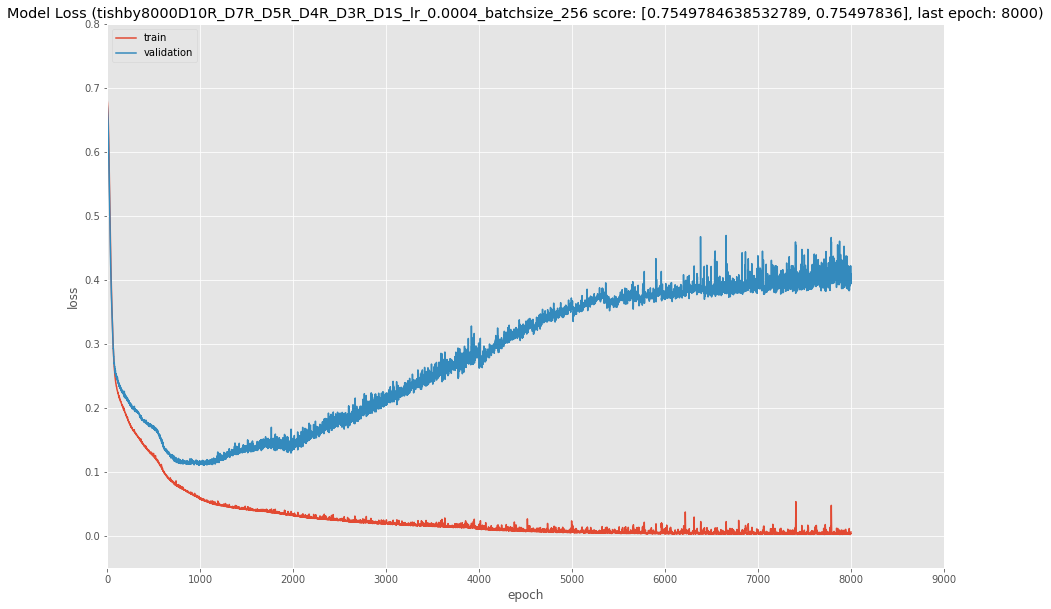

In [9]:
plotting.plot_history(history.history, common_name, show_flag, save_plots)

creating testscore devolopment plot


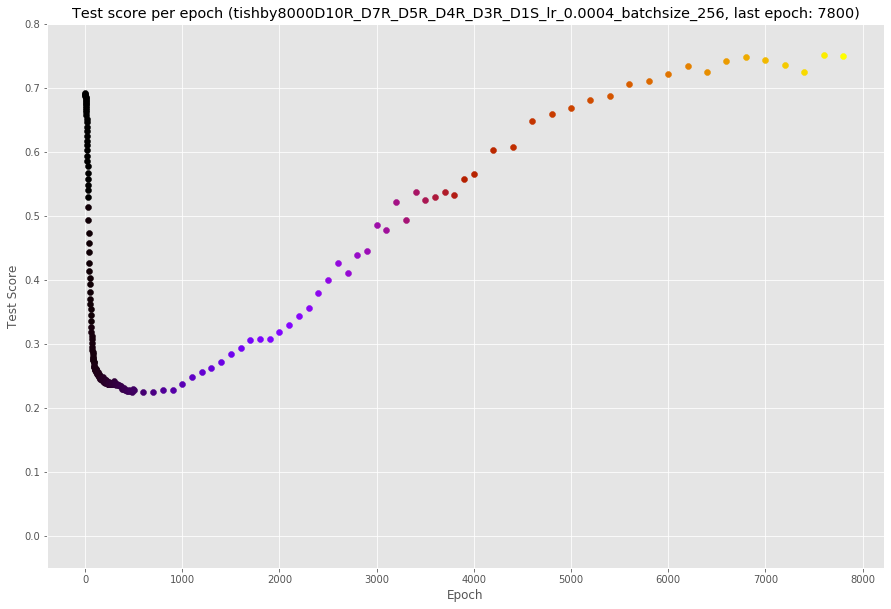

In [10]:
if rec_test_flag:
    plotting.plot_test_development(outputs.int_model_score, common_name,
                                   show_flag, save_plots)

## Evaluation caluclations


o max:  {0: 3.9697633, 1: 4.979089, 2: 5.8130517, 3: 12.297069, 4: 36.364716, 5: 1.0}
o min:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
X and Y MI:  0.9976734295143714 , X Entropy:  11.677719641641012
MI for epoch  0  is being calculated for  0.07  bins
MI for epoch  1  is being calculated for  0.07  bins
MI for epoch  2  is being calculated for  0.07  bins
MI for epoch  3  is being calculated for  0.07  bins
MI for epoch  4  is being calculated for  0.07  bins
MI for epoch  5  is being calculated for  0.07  bins
MI for epoch  6  is being calculated for  0.07  bins
MI for epoch  7  is being calculated for  0.07  bins
MI for epoch  8  is being calculated for  0.07  bins
MI for epoch  9  is being calculated for  0.07  bins
MI for epoch  10  is being calculated for  0.07  bins
MI for epoch  11  is being calculated for  0.07  bins
MI for epoch  12  is being calculated for  0.07  bins
MI for epoch  13  is being calculated for  0.07  bins
MI for epoch  14  is being calculated for  0.0

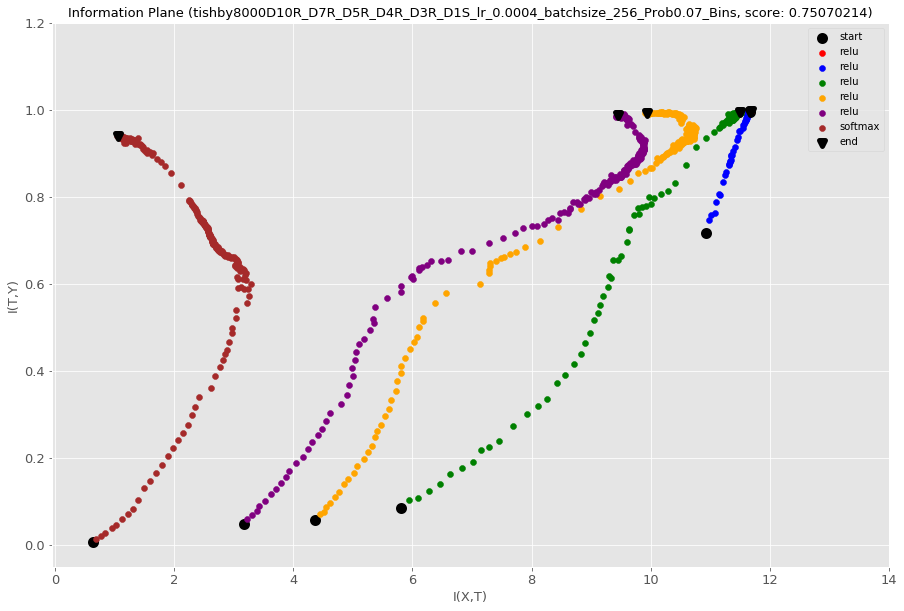

creating info plane epoch view plot


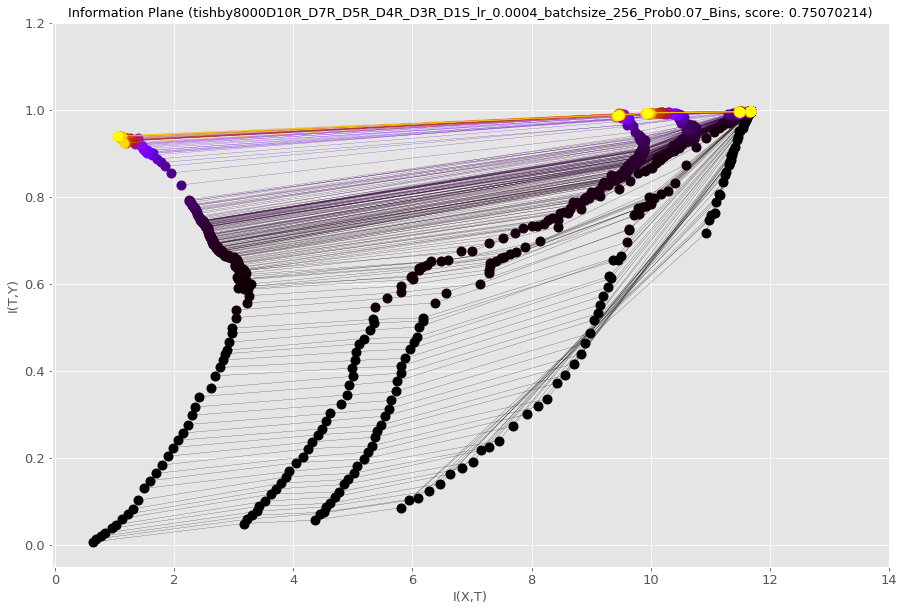

Creating combinationview plot


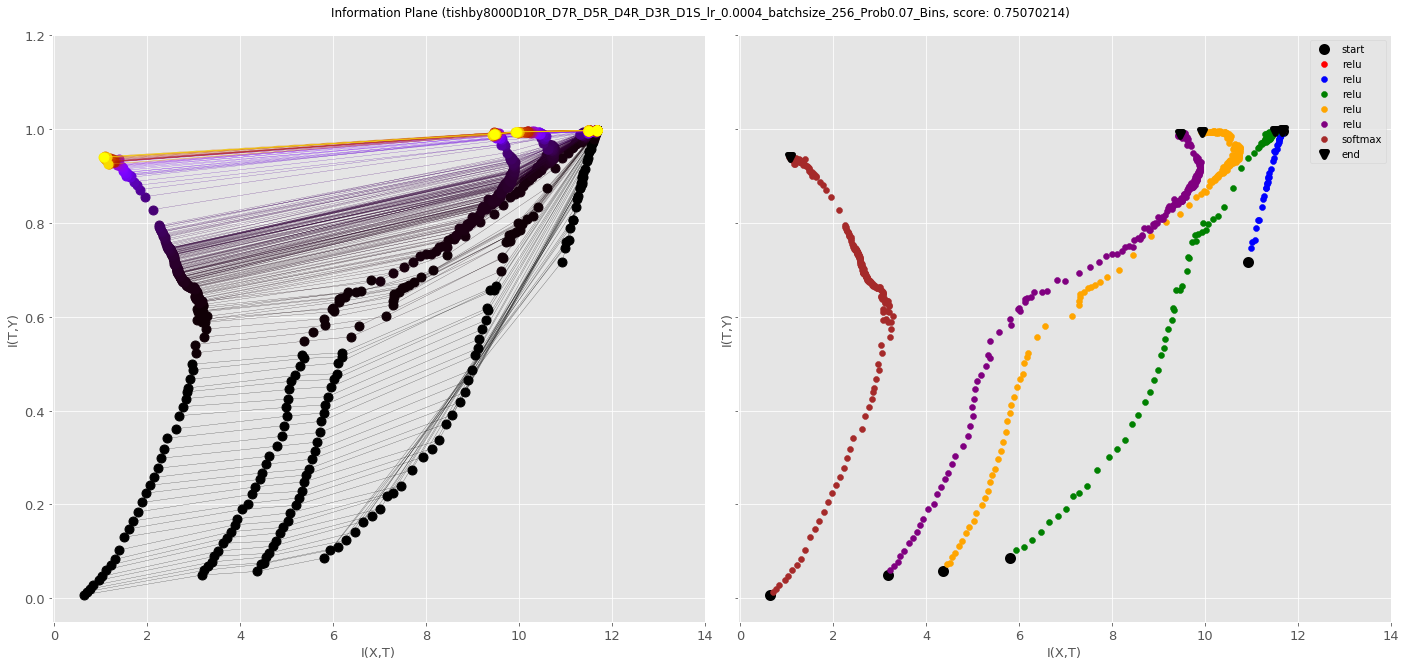

In [14]:
# est_type_flag defines which estimator is to be used
# 1: binning, 2: EDGE, 3: Kolchinsky upper, 4: Kolchinsky lower, 5: Krasov
est_type_flag = 1

# if bins are used
# bin_size_or_nr: True means that given bins represent bin size
# False means amount of bins
bin_size_or_nr_flag=True
bins = 0.07
# if True calculations are parallelised
parallel = False

# Plotting:
# show_flag: True means that plots will be shown
# separate_flag: plot layers in a separate view as well
# save_flag: means plots and MI data will be saved
show = True
separate = False
save = True
# color_list defines which colors are used in plots
color_list = ["red", "blue", "green", "orange", "purple",
              "brown", "pink", "teal", "goldenrod"]

# starts information plane creation
seed(1337)
set_random_seed(1337)
if est_type_flag == 1:
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, bin_amount=bins,
                                bin_size_or_nr=bin_size_or_nr_flag, show_flag=show,
                                separate_flag=separate,
                                save_flag=save, par_flag=parallel)
        
else:
    info_plane.create_infoplane(common_name, X_train, y_train, outputs,
                                est_type_flag, color_list, show_flag=show,
                                separate_flag=separate,
                                save_flag=save, par_flag=parallel)